<div style="display: flex; background-color: RGB(255,184,100);" >
  <h1 style="margin: auto; padding: 30px; text-align: center;">
    <span>ANALYSE DU CHIFFRE D'AFFAIRES DU SITE LAPAGE</span><br>
    <span>Nettoyage des données</span>
  </h1>
</div>

# OBJECTIFS DE CE NOTEBOOK
#### - Comprendre et maîtriser le jeu de données
#### - Uniformiser les données
#### - Joindre les tables
#### - Exporter les données nettoyées 

## Sommaire

- [Etape 1 - Importation des librairies et chargement des fichiers](#etape-1)
  - [1.1 Importation des librairies](#1-1)
  - [1.2 Importation des fichiers](#1-2)
- [Etape 2 - Analyse exploratoire des fichiers](#etape-2)
  - [2.1 Fichier clients](#2-1)
  - [2.2 Fichier produits](#2-2)
  - [2.3 Fichier transactions](#2-3)
- [Etape 3 - Jonction des fichiers](#etape-3)
  - [3.1 Jonction des fichiers clients et transactions](#3-1)
    - [3.1.1 Test avec outer join](#3-1-1)
    - [3.1.2 Test avec inner join](#3-1-2)
  - [3.2 Jonction avec le fichier produits](#3-2)
    - [3.2.1 Test avec outer join](#3-2-1)
    - [3.2.2 Test avec inner join](#3-2-2)
- [Etape 4 - Exportation des données](#etape-4)

<div style="background-color: RGB(255,184,100);">
    <h2 id="etape-1" style="margin: auto; padding: 20px;">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="1-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">1.1 - Importation des librairies</h3>
</div>


In [2]:
# Importation de la librairie Pandas
import pandas as pd

# Importation de la librairie Matplotlib
import matplotlib.pyplot as plt

# Importation de la librairie Seaborn
import seaborn as sns

# Importation de la librairie Plotly
import plotly.express as px

# Importation de la librairie Numpy
import numpy as np

In [3]:
!pip install pandas

Liste des librairies utilisés :
- pandas (2.2.2)
- numpy (1.26.4)
- python-dateutil (2.8.2)
- pytz (2023.3.post1)
- tzdata (2023.3)
- six (1.16.0)

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="1-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">1.2 - Importation des fichiers</h3>
</div>

In [4]:
# Importation du fichier customers.csv
chemin_fichier_customers = '/Users/adrianaguilera/Desktop/P9/inputs/data/customers.csv'
clients = pd.read_csv(chemin_fichier_customers, sep=";")

# Importation du fichier products.csv
chemin_fichier_products = '/Users/adrianaguilera/Desktop/P9/inputs/data/products.csv'
produits = pd.read_csv(chemin_fichier_products, sep=";")

# Importation du fichier transactions.csv
chemin_fichier_transactions = '/Users/adrianaguilera/Desktop/P9/inputs/data/transactions.csv'
transactions = pd.read_csv(chemin_fichier_transactions, sep=";")

/var/folders/k4/rxs7cpkn25x36yd1rknb1pvc0000gn/T/ipykernel_37238/3995001245.py:11: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv(chemin_fichier_transactions, sep=";")


<div style="background-color: RGB(255,184,100);" >
  <h2 id="etape-2" style="margin: auto; padding: 20px;">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.1 - Fichier clients</h3>
</div>

In [5]:
# Création d'une fonction afin d'automatiser l'affichage des informations clés de l'analyse exploratoire
def analyser_dataframe(df, nom_table="Tables"):
    """
    Retourne des informations clés :
    - Nombre de colonnes
    - Types de données
    - Nombre de valeurs présentes, uniques, doublons, et nulles
    - Aperçu des 5 premières lignes
    """
    print(f"\n=== Analyse de {nom_table} ===")
    
    #Afficher les dimensions du dataset
    print("Le tableau comporte {} observation(s) ou article(s)".format(df.shape[0]))

    # Nombre de colonnes
    print(f"Le tableau comporte {df.shape[1]} colonne(s).")
    
    # Nature des données
    print("\nNature des données dans chacune des colonnes :")
    print(df.dtypes)
    
    # Nombre de valeurs présentes
    print("\nNombre de valeurs présentes dans chacune des colonnes :")
    print(df.count())
    
    # Nombre de valeurs uniques
    print("\nNombre de valeurs uniques dans chacune des colonnes :")
    print(df.nunique())
    
    # Nombre de doublons
    doublons = df.count() - df.nunique()
    print("\nNombre de doublons présents dans chacune des colonnes :")
    print(doublons)
    
    # Nombre de valeurs nulles
    print("\nNombre de valeurs nulles présentes dans chacune des colonnes :")
    print(df.isna().sum())
    
    # Aperçu des 5 premières lignes
    print("\nAperçu des 5 premières lignes de la table :")
    print(df.head())

In [6]:
# Afficher les principales informations sur la table
analyser_dataframe(clients, nom_table="Clients")


=== Analyse de Clients ===
Le tableau comporte 8621 observation(s) ou article(s)
Le tableau comporte 3 colonne(s).

Nature des données dans chacune des colonnes :
client_id    object
sex          object
birth         int64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
client_id    8621
sex          8621
birth        8621
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
client_id    8621
sex             2
birth          76
dtype: int64

Nombre de doublons présents dans chacune des colonnes :
client_id       0
sex          8619
birth        8545
dtype: int64

Nombre de valeurs nulles présentes dans chacune des colonnes :
client_id    0
sex          0
birth        0
dtype: int64

Aperçu des 5 premières lignes de la table :
  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943


In [7]:
# Vérifier les valeurs uniques dans la colonne 'sex'
clients_sex_valeurs_uniques = clients['sex'].unique()
print("Valeurs uniques dans 'sex' : {}".format(clients_sex_valeurs_uniques))

Valeurs uniques dans 'sex' : ['f' 'm']


In [8]:
# Afficher un aperçu rapide des données
clients.describe() 

birth
count  8621.000000
mean   1978.275606
std      16.917958
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000

### Le fichier clients contient **8 621 client_id** et renseigne le **sexe** et la **date de naissance** de chaque client.

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.2 - Fichier produits</h3>
</div>

In [9]:
# Afficher les principales informations sur la table
analyser_dataframe(produits, nom_table="Produits")


=== Analyse de Produits ===
Le tableau comporte 3286 observation(s) ou article(s)
Le tableau comporte 3 colonne(s).

Nature des données dans chacune des colonnes :
id_prod     object
price      float64
categ        int64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
id_prod    3286
price      3286
categ      3286
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
id_prod    3286
price      1454
categ         3
dtype: int64

Nombre de doublons présents dans chacune des colonnes :
id_prod       0
price      1832
categ      3283
dtype: int64

Nombre de valeurs nulles présentes dans chacune des colonnes :
id_prod    0
price      0
categ      0
dtype: int64

Aperçu des 5 premières lignes de la table :
  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0


In [10]:
# Vérifier les valeurs uniques dans la colonne 'categ'
produits_categ_valeurs_uniques = produits['categ'].unique()
print("Valeurs uniques dans 'categ' : {}".format(produits_categ_valeurs_uniques))

Valeurs uniques dans 'categ' : [0 1 2]


In [11]:
# Afficher un aperçu rapide des données
produits.describe() 

price        categ
count  3286.000000  3286.000000
mean     21.863597     0.370359
std      29.849786     0.615446
min       0.620000     0.000000
25%       6.990000     0.000000
50%      13.075000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000

In [12]:
# Filtrer les lignes où la colonne "price" est égale à 0.62
produits_verif_price_min = produits.loc[produits["price"] == 0.62]
produits_verif_price_min

id_prod  price  categ
2271   0_528   0.62      0
2354   0_202   0.62      0

### Le fichier produits contient **3 286 id_product** et renseigne le **prix** et la **catégorie** de chaque produit.

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.3 - Fichier transactions</h3>
</div>

In [13]:
# Afficher les principales informations sur la table
analyser_dataframe(transactions, nom_table="Transactions")


=== Analyse de Transactions ===
Le tableau comporte 1048575 observation(s) ou article(s)
Le tableau comporte 4 colonne(s).

Nature des données dans chacune des colonnes :
id_prod       object
date          object
session_id    object
client_id     object
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
id_prod       687534
date          687534
session_id    687534
client_id     687534
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
id_prod         3265
date          687419
session_id    345505
client_id       8600
dtype: int64

Nombre de doublons présents dans chacune des colonnes :
id_prod       684269
date             115
session_id    342029
client_id     678934
dtype: int64

Nombre de valeurs nulles présentes dans chacune des colonnes :
id_prod       361041
date          361041
session_id    361041
client_id     361041
dtype: int64

Aperçu des 5 premières lignes de la table :
  id_prod                        date session_id client_id
0  0_

In [14]:
# Supprimer toutes les lignes entièrement vides
transactions.dropna(how="all", inplace=True)

# Nombre de valeurs nulles
print("\nNombre de valeurs nulles présentes dans chacune des colonnes :")
print(transactions.isna().sum())


Nombre de valeurs nulles présentes dans chacune des colonnes :
id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [15]:
# Convertir la colonne date en datetime
transactions["date"] = pd.to_datetime(transactions["date"])

# Extraire les composantes de la date
transactions["année"] = transactions["date"].dt.year
transactions["mois"] = transactions["date"].dt.month
transactions["jour"] = transactions["date"].dt.day
transactions["heure"] = transactions["date"].dt.strftime("%H:%M")

# Convertir les nouvelles colonnes en int64
transactions["année"] = transactions["année"].astype("int64")
transactions["mois"] = transactions["mois"].astype("int64")
transactions["jour"] = transactions["jour"].astype("int64")

# Supprimer la colonne 'date'
del transactions["date"]

# Afficher le résultat
transactions

id_prod session_id client_id  année  mois  jour  heure
0       0_1259        s_1     c_329   2021     3     1  00:01
1       0_1390        s_2     c_664   2021     3     1  00:02
2       0_1352        s_3     c_580   2021     3     1  00:02
3       0_1458        s_4    c_7912   2021     3     1  00:04
4       0_1358        s_5    c_2033   2021     3     1  00:05
...        ...        ...       ...    ...   ...   ...    ...
687529   1_508   s_348444    c_3573   2023     2    28  23:49
687530    2_37   s_348445      c_50   2023     2    28  23:51
687531   1_695   s_348446     c_488   2023     2    28  23:53
687532  0_1547   s_348447    c_4848   2023     2    28  23:58
687533  0_1398   s_348435    c_3575   2023     2    28  23:58

[687534 rows x 7 columns]

In [16]:
# Afficher un aperçu rapide des données
transactions.describe() 

année           mois           jour
count  687534.000000  687534.000000  687534.000000
mean     2021.662289       6.547208      15.715258
std         0.618184       3.480693       8.803949
min      2021.000000       1.000000       1.000000
25%      2021.000000       4.000000       8.000000
50%      2022.000000       7.000000      16.000000
75%      2022.000000      10.000000      23.000000
max      2023.000000      12.000000      31.000000

In [17]:
# Nombre de valeurs uniques
transactions_valeurs_uniques = transactions.nunique()
transactions_valeurs_uniques

id_prod         3265
session_id    345505
client_id       8600
année              3
mois              12
jour              31
heure           1440
dtype: int64

### Le fichier transactions contient **345 505 session_id**, **3 265 id_prod** et **8 600 client_id**. Notons qu'il y a 21 clients et 21 produits en moins que dans les tables précédentes.
### Il renseigne la **date** (année, mois, jour) et **l'heure** de chaque commande.

<div style="background-color: RGB(255,184,100);" >
  <h2 id="etape-3" style="margin: auto; padding: 20px;">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="3-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.1 - Jonction des fichiers clients et transactions</h3>
</div>

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="3-1-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.1.1 - Test avec outer join</h4>
</div>

In [18]:
# Fusionner les fichiers clients et transactions en activant l'option de .merge indicator = True
merge_test_outer = pd.merge(clients, transactions, on='client_id', how='outer', indicator=True)

# Afficher le résultat
merge_test_outer.head()

client_id sex  birth id_prod session_id   année  mois  jour  heure _merge
0       c_1   m   1955  0_1470    s_47346  2021.0   6.0  11.0  21:02   both
1       c_1   m   1955   0_513    s_65433  2021.0   7.0  21.0  22:41   both
2       c_1   m   1955  0_1186    s_66947  2021.0   7.0  25.0  12:17   both
3       c_1   m   1955  0_1448    s_67467  2021.0   7.0  26.0  17:37   both
4       c_1   m   1955  0_1475    s_67769  2021.0   7.0  27.0  10:30   both

In [19]:
# Analyser des 'left_only' (présents uniquement dans clients) et 'right_only' (présents uniquement dans transactions)
left_only = merge_test_outer[merge_test_outer['_merge'] == 'left_only']
right_only = merge_test_outer[merge_test_outer['_merge'] == 'right_only']

# Compter le nombre de lignes "left_only" et "right_only"
merge_test_outer_left_only_nombre = len(left_only)
merge_test_outer_right_only_nombre = len(right_only)

# Calculer le pourcentage de lignes "left_only" et "right_only"
total_rows = len(merge_test_outer)
left_only_pourcentage = (merge_test_outer_left_only_nombre / total_rows) * 100
right_only_pourcentage = (merge_test_outer_right_only_nombre / total_rows) * 100

# Afficher les résultats
print(f"Nombre de lignes uniquement dans clients ('left_only') : {merge_test_outer_left_only_nombre} ({left_only_pourcentage:.2f}%)")
print(f"Nombre de lignes uniquement dans transactions ('right_only') : {merge_test_outer_right_only_nombre} ({right_only_pourcentage:.2f}%)")

Nombre de lignes uniquement dans clients ('left_only') : 21 (0.00%)
Nombre de lignes uniquement dans transactions ('right_only') : 0 (0.00%)


In [20]:
# Afficher les 21 lignes client_id non présentes dans la table transactions
left_only

client_id sex  birth id_prod session_id  année  mois  jour heure  \
18399     c_1223   m   1963     NaN        NaN    NaN   NaN   NaN   NaN   
167262    c_2706   f   1967     NaN        NaN    NaN   NaN   NaN   NaN   
191551    c_3017   f   1992     NaN        NaN    NaN   NaN   NaN   NaN   
225851    c_3443   m   1959     NaN        NaN    NaN   NaN   NaN   NaN   
240172    c_3526   m   1956     NaN        NaN    NaN   NaN   NaN   NaN   
261001    c_3789   f   1997     NaN        NaN    NaN   NaN   NaN   NaN   
282271    c_4086   f   1992     NaN        NaN    NaN   NaN   NaN   NaN   
305952    c_4358   m   1999     NaN        NaN    NaN   NaN   NaN   NaN   
309172    c_4406   f   1998     NaN        NaN    NaN   NaN   NaN   NaN   
312791    c_4447   m   1956     NaN        NaN    NaN   NaN   NaN   NaN   
380504    c_5223   m   2003     NaN        NaN    NaN   NaN   NaN   NaN   
381688    c_5245   f   2004     NaN        NaN    NaN   NaN   NaN   NaN   
434945     c_587   m   1993     NaN        NaN    NaN   NaN   NaN   NaN   
519107    c_6735   m   2004     NaN        NaN    NaN   NaN   NaN   NaN   
528931    c_6862   f   2002     NaN        NaN    NaN   NaN   NaN   NaN   
534744    c_6930   m   2004     NaN        NaN    NaN   NaN   NaN   NaN   
590311    c_7584   f   1960     NaN        NaN    NaN   NaN   NaN   NaN   
646880    c_8253   f   2001     NaN        NaN    NaN   NaN   NaN   NaN   
657710    c_8381   f   1965     NaN        NaN    NaN   NaN   NaN   NaN   
677536     c_862   f   1956     NaN        NaN    NaN   NaN   NaN   NaN   
681129      c_90   m   2001     NaN        NaN    NaN   NaN   NaN   NaN   

           _merge  
18399   left_only  
167262  left_only  
191551  left_only  
225851  left_only  
240172  left_only  
261001  left_only  
282271  left_only  
305952  left_only  
309172  left_only  
312791  left_only  
380504  left_only  
381688  left_only  
434945  left_only  
519107  left_only  
528931  left_only  
534744  left_only  
590311  left_only  
646880  left_only  
657710  left_only  
677536  left_only  
681129  left_only

In [21]:
# Afficher les principales informations sur la table
analyser_dataframe(merge_test_outer, nom_table="merge_test_outer")


=== Analyse de merge_test_outer ===
Le tableau comporte 687555 observation(s) ou article(s)
Le tableau comporte 10 colonne(s).

Nature des données dans chacune des colonnes :
client_id       object
sex             object
birth            int64
id_prod         object
session_id      object
année          float64
mois           float64
jour           float64
heure           object
_merge        category
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
client_id     687555
sex           687555
birth         687555
id_prod       687534
session_id    687534
année         687534
mois          687534
jour          687534
heure         687534
_merge        687555
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
client_id       8621
sex                2
birth             76
id_prod         3265
session_id    345505
année              3
mois              12
jour              31
heure           1440
_merge             2
dtype: int64

Nombre de doublons pr

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="3-1-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.1.2 - Test avec inner join</h4>
</div>

In [22]:
# Fusionner les fichiers clients et transactions en activant l'option de .merge indicator = True
merge_test_inner = pd.merge(clients, transactions, on='client_id', how='inner', indicator=True)

# Afficher le résultat
merge_test_inner.head()

client_id sex  birth id_prod session_id  année  mois  jour  heure _merge
0    c_4410   f   1967   1_483     s_5913   2021     3    13  21:35   both
1    c_4410   f   1967  0_1111     s_9707   2021     3    22  01:27   both
2    c_4410   f   1967   1_385     s_9707   2021     3    22  01:40   both
3    c_4410   f   1967  0_1455     s_9942   2021     3    22  14:29   both
4    c_4410   f   1967  0_1420    s_10092   2021     3    22  22:31   both

In [23]:
# Analyser des 'left_only' (présents uniquement dans clients) et 'right_only' (présents uniquement dans transactions)
left_only_inner = merge_test_inner[merge_test_inner['_merge'] == 'left_only']
right_only_inner = merge_test_inner[merge_test_inner['_merge'] == 'right_only']

# Compter le nombre de lignes "left_only" et "right_only"
merge_test_inner_left_only_nombre = len(left_only_inner)
merge_test_inner_right_only_nombre = len(right_only_inner)

# Calculer le pourcentage de lignes "left_only" et "right_only"
total_rows_inner = len(merge_test_inner)
left_only_pourcentage_inner = (merge_test_inner_left_only_nombre / total_rows_inner) * 100
right_only_pourcentage_inner = (merge_test_inner_right_only_nombre / total_rows_inner) * 100

# Afficher les résultats
print(f"Nombre de lignes uniquement dans clients ('left_only') : {merge_test_inner_left_only_nombre} ({left_only_pourcentage_inner:.2f}%)")
print(f"Nombre de lignes uniquement dans transactions ('right_only') : {merge_test_inner_right_only_nombre} ({right_only_pourcentage_inner:.2f}%)")

Nombre de lignes uniquement dans clients ('left_only') : 0 (0.00%)
Nombre de lignes uniquement dans transactions ('right_only') : 0 (0.00%)


In [24]:
# Afficher les principales informations sur la table
analyser_dataframe(merge_test_inner, nom_table="merge_test_inner")


=== Analyse de merge_test_inner ===
Le tableau comporte 687534 observation(s) ou article(s)
Le tableau comporte 10 colonne(s).

Nature des données dans chacune des colonnes :
client_id       object
sex             object
birth            int64
id_prod         object
session_id      object
année            int64
mois             int64
jour             int64
heure           object
_merge        category
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
client_id     687534
sex           687534
birth         687534
id_prod       687534
session_id    687534
année         687534
mois          687534
jour          687534
heure         687534
_merge        687534
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
client_id       8600
sex                2
birth             76
id_prod         3265
session_id    345505
année              3
mois              12
jour              31
heure           1440
_merge             1
dtype: int64

Nombre de doublons pr

<div style="font-size: 18px;"> Nous allons garder la jointure <strong>Inner</strong> afin d'éviter d'avoir des valeurs nulles qui pourraient compromettre les résultats. Cela va retirer de la BDD les 21 clients qui n'ont rien commandé.
</div>

In [25]:
# Supprimer la colonne _merge pour éviter un éventuel conflit avec la future jonction
merge_test_inner = merge_test_inner.drop(columns=['_merge'])

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="3-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.2 - Jonction avec le fichier produits</h3>
</div>

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="3-2-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.2.1 - Test avec outer join</h4>
</div>

In [26]:
# Fusionner la première jointure avec le fichier produits en activant l'option de .merge indicator = True
merge_test_outer2 = pd.merge(merge_test_inner, produits, on='id_prod', how='outer', indicator=True)

# Afficher le résultat
merge_test_outer2.head()

client_id sex   birth id_prod session_id   année  mois  jour  heure  price  \
0    c_6616   f  1954.0     0_0    s_51942  2021.0   6.0  21.0  23:24   3.75   
1    c_5152   f  1986.0     0_0      s_282  2021.0   3.0   1.0  13:45   3.75   
2    c_5152   f  1986.0     0_0   s_276224  2022.0  10.0   1.0  13:45   3.75   
3    c_5152   f  1986.0     0_0   s_305572  2022.0  12.0   1.0  13:45   3.75   
4    c_5152   f  1986.0     0_0   s_320434  2023.0   1.0   1.0  13:45   3.75   

   categ _merge  
0      0   both  
1      0   both  
2      0   both  
3      0   both  
4      0   both

In [27]:
# Analyser des 'left_only' (présents uniquement dans la première jointure) et 'right_only' (présents uniquement dans produits)
left_only2 = merge_test_outer2[merge_test_outer2['_merge'] == 'left_only']
right_only2 = merge_test_outer2[merge_test_outer2['_merge'] == 'right_only']

# Compter le nombre de lignes "left_only" et "right_only"
merge_test_outer_left_only_nombre2 = len(left_only2)
merge_test_outer_right_only_nombre2 = len(right_only2)

# Calculer le pourcentage de lignes "left_only" et "right_only"
total_rows2 = len(merge_test_outer2)
left_only_pourcentage2 = (merge_test_outer_left_only_nombre2 / total_rows2) * 100
right_only_pourcentage2 = (merge_test_outer_right_only_nombre2 / total_rows2) * 100

# Afficher les résultats
print(f"Nombre de lignes uniquement dans la première jointure ('left_only') : {merge_test_outer_left_only_nombre2} ({left_only_pourcentage2:.2f}%)")
print(f"Nombre de lignes uniquement dans produits ('right_only') : {merge_test_outer_right_only_nombre2} ({right_only_pourcentage2:.2f}%)")

Nombre de lignes uniquement dans la première jointure ('left_only') : 0 (0.00%)
Nombre de lignes uniquement dans produits ('right_only') : 21 (0.00%)


In [28]:
right_only2

client_id  sex  birth id_prod session_id  année  mois  jour heure  \
6073         NaN  NaN    NaN  0_1014        NaN    NaN   NaN   NaN   NaN   
6511         NaN  NaN    NaN  0_1016        NaN    NaN   NaN   NaN   NaN   
8723         NaN  NaN    NaN  0_1025        NaN    NaN   NaN   NaN   NaN   
21687        NaN  NaN    NaN  0_1062        NaN    NaN   NaN   NaN   NaN   
40971        NaN  NaN    NaN  0_1119        NaN    NaN   NaN   NaN   NaN   
94245        NaN  NaN    NaN  0_1318        NaN    NaN   NaN   NaN   NaN   
297077       NaN  NaN    NaN  0_1620        NaN    NaN   NaN   NaN   NaN   
299185       NaN  NaN    NaN  0_1624        NaN    NaN   NaN   NaN   NaN   
311123       NaN  NaN    NaN  0_1645        NaN    NaN   NaN   NaN   NaN   
323013       NaN  NaN    NaN  0_1780        NaN    NaN   NaN   NaN   NaN   
325137       NaN  NaN    NaN  0_1800        NaN    NaN   NaN   NaN   NaN   
387651       NaN  NaN    NaN  0_2308        NaN    NaN   NaN   NaN   NaN   
389726       NaN  NaN    NaN   0_299        NaN    NaN   NaN   NaN   NaN   
390221       NaN  NaN    NaN   0_310        NaN    NaN   NaN   NaN   NaN   
390689       NaN  NaN    NaN   0_322        NaN    NaN   NaN   NaN   NaN   
397070       NaN  NaN    NaN   0_510        NaN    NaN   NaN   NaN   NaN   
415475       NaN  NaN    NaN     1_0        NaN    NaN   NaN   NaN   NaN   
514820       NaN  NaN    NaN   1_394        NaN    NaN   NaN   NaN   NaN   
685998       NaN  NaN    NaN    2_72        NaN    NaN   NaN   NaN   NaN   
686501       NaN  NaN    NaN    2_86        NaN    NaN   NaN   NaN   NaN   
686502       NaN  NaN    NaN    2_87        NaN    NaN   NaN   NaN   NaN   

         price  categ      _merge  
6073      1.15      0  right_only  
6511     35.06      0  right_only  
8723     24.99      0  right_only  
21687    20.08      0  right_only  
40971     2.99      0  right_only  
94245    20.92      0  right_only  
297077    0.80      0  right_only  
299185   24.50      0  right_only  
311123    2.99      0  right_only  
323013    1.67      0  right_only  
325137   22.05      0  right_only  
387651   20.28      0  right_only  
389726   22.99      0  right_only  
390221    1.94      0  right_only  
390689    2.99      0  right_only  
397070   23.66      0  right_only  
415475   31.82      1  right_only  
514820   39.73      1  right_only  
685998  141.32      2  right_only  
686501  132.36      2  right_only  
686502  220.99      2  right_only

In [29]:
# Afficher les principales informations sur la table
analyser_dataframe(merge_test_outer2, nom_table="merge_test_outer2")


=== Analyse de merge_test_outer2 ===
Le tableau comporte 687555 observation(s) ou article(s)
Le tableau comporte 12 colonne(s).

Nature des données dans chacune des colonnes :
client_id       object
sex             object
birth          float64
id_prod         object
session_id      object
année          float64
mois           float64
jour           float64
heure           object
price          float64
categ            int64
_merge        category
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
client_id     687534
sex           687534
birth         687534
id_prod       687555
session_id    687534
année         687534
mois          687534
jour          687534
heure         687534
price         687555
categ         687555
_merge        687555
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
client_id       8600
sex                2
birth             76
id_prod         3286
session_id    345505
année              3
mois              12
jour     

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="3-2-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.2.2 - Test avec inner join</h4>
</div>

In [30]:
# Fusionner la première jointure avec le fichier produits en activant l'option de .merge indicator = True
merge_test_inner2 = pd.merge(merge_test_inner, produits, on='id_prod', how='inner', indicator=True)

# Afficher le résultat
merge_test_inner2.head()

client_id sex  birth id_prod session_id  année  mois  jour  heure  price  \
0    c_4410   f   1967   1_483     s_5913   2021     3    13  21:35  15.99   
1    c_4410   f   1967  0_1111     s_9707   2021     3    22  01:27  19.99   
2    c_4410   f   1967   1_385     s_9707   2021     3    22  01:40  25.99   
3    c_4410   f   1967  0_1455     s_9942   2021     3    22  14:29   8.99   
4    c_4410   f   1967  0_1420    s_10092   2021     3    22  22:31  11.53   

   categ _merge  
0      1   both  
1      0   both  
2      1   both  
3      0   both  
4      0   both

In [31]:
# Analyser des 'left_only' (présents uniquement dans la première jointure) et 'right_only' (présents uniquement dans produits)
left_only_inner2 = merge_test_inner2[merge_test_inner2['_merge'] == 'left_only']
right_only_inner2 = merge_test_inner2[merge_test_inner2['_merge'] == 'right_only']

# Compter le nombre de lignes "left_only" et "right_only"
merge_test_inner_left_only_nombre2 = len(left_only_inner2)
merge_test_inner_right_only_nombre2 = len(right_only_inner2)

# Calculer le pourcentage de lignes "left_only" et "right_only"
total_rows_inner2 = len(merge_test_inner2)
left_only_pourcentage_inner2 = (merge_test_inner_left_only_nombre2 / total_rows_inner2) * 100
right_only_pourcentage_inner2 = (merge_test_inner_right_only_nombre2 / total_rows_inner2) * 100

# Afficher les résultats
print(f"Nombre de lignes uniquement dans la première jointure ('left_only') : {merge_test_inner_left_only_nombre2} ({left_only_pourcentage_inner2:.2f}%)")
print(f"Nombre de lignes uniquement dans produits ('right_only') : {merge_test_inner_right_only_nombre2} ({right_only_pourcentage_inner2:.2f}%)")

Nombre de lignes uniquement dans la première jointure ('left_only') : 0 (0.00%)
Nombre de lignes uniquement dans produits ('right_only') : 0 (0.00%)


In [32]:
# Afficher les principales informations sur la table
analyser_dataframe(merge_test_inner2, nom_table="merge_test_inner2")


=== Analyse de merge_test_inner2 ===
Le tableau comporte 687534 observation(s) ou article(s)
Le tableau comporte 12 colonne(s).

Nature des données dans chacune des colonnes :
client_id       object
sex             object
birth            int64
id_prod         object
session_id      object
année            int64
mois             int64
jour             int64
heure           object
price          float64
categ            int64
_merge        category
dtype: object

Nombre de valeurs présentes dans chacune des colonnes :
client_id     687534
sex           687534
birth         687534
id_prod       687534
session_id    687534
année         687534
mois          687534
jour          687534
heure         687534
price         687534
categ         687534
_merge        687534
dtype: int64

Nombre de valeurs uniques dans chacune des colonnes :
client_id       8600
sex                2
birth             76
id_prod         3265
session_id    345505
année              3
mois              12
jour     

<div style="font-size: 18px;"> Nous allons garder la jointure <strong>Inner</strong> afin d'éviter d'avoir des valeurs nulles qui pourraient compromettre les résultats. De plus, tout correspond avec la première jointure. Cela va donc retirer de la BDD les 21 produits qui jamais été commandés. 
</div>

In [33]:
# Supprimer la colonne _merge pour éviter un éventuel conflit avec la future jonction
merge_test_inner2 = merge_test_inner2.drop(columns=['_merge'])

# Renommer la dataframe et supprimer l'ancienne
donnees = merge_test_inner2
del merge_test_inner2

# Afficher la dataframe finale 
donnees.head()

client_id sex  birth id_prod session_id  année  mois  jour  heure  price  \
0    c_4410   f   1967   1_483     s_5913   2021     3    13  21:35  15.99   
1    c_4410   f   1967  0_1111     s_9707   2021     3    22  01:27  19.99   
2    c_4410   f   1967   1_385     s_9707   2021     3    22  01:40  25.99   
3    c_4410   f   1967  0_1455     s_9942   2021     3    22  14:29   8.99   
4    c_4410   f   1967  0_1420    s_10092   2021     3    22  22:31  11.53   

   categ  
0      1  
1      0  
2      1  
3      0  
4      0

<div style="background-color: RGB(255,184,100);" >
  <h2 id="etape-4" style="margin: auto; padding: 20px;">Etape 4 - Exportation des données</h2>
</div>

In [34]:
# Exporter la table 
donnees.to_csv('donnees_exportees.csv', index=False)

<div style="font-size: 18px;"> Nous pouvons <strong>exporter les données en fichier un csv</strong> afin de les réutliser pour une analyse approfondie. 
Le fichier comporte 687 534 lignes avec des données complètes, propres et exploitables.
</div>

<div style="display: flex; background-color: RGB(255,184,100);" >
  <h1 style="margin: auto; padding: 30px; text-align: center;">
    <span>ANALYSE DU CHIFFRE D'AFFAIRES DU SITE LAPAGE</span><br>
    <span>Analyse des données</span>
  </h1>
</div>

# OBJECTIFS DE CE NOTEBOOK
#### - Analyser les données sur les ventes en ligne 
#### - Identifier les points forts et les faiblesses
#### - Identifier les comportements clients

# Sommaire

- [Etape 1 - Importation des librairies et chargement des fichiers](#etape-1)
  - [1.1 Importation des librairies](#1-1)
  - [1.2 Importation des données](#1-2)
- [Etape 2 - Analyses du CA](#etape-2)
  - [2.1 Analyses générales](#2-1)
  - [2.2 Évolutions temporelle](#2-2)
     - [2.2.1 Évolution mensuelle sur les deux années](#2-2-1)
     - [2.2.2 Évolution mensuelle sur une année civile](#2-2-2)
     - [2.2.3 Évolution quotidienne sur les deux années](#2-2-3)
  - [2.3 Zoom sur le mois d'octobre 2021](#2-3) 
- [Etape 3 - Tops et flops](#etape-3)
  - [3.1 Les tops](#3-1)
    - [3.1.1 TOP 10 clients](#3-1-1) 
    - [3.1.2 TOP 10 produits](#3-1-2) 
  - [3.2 Les flops](#3-2)
    - [3.2.1 FLOP 10 clients](#3-2-1) 
    - [3.2.2 FLOP 10 produits](#3-2-2) 
- [Etape 4 - Analyse des profils des clients](#etape-4)
  - [4.1 Analyse des clients BtoB](#4-1)
  - [4.2 Courbe de Lorenz](#4-2)
  - [4.3 Principe de Pareto](#4-3)
  - [4.4 Suppression des clients BtoB](#4-4)
- [Etape 5 - Analyses par segments](#etape-5)
  - [5.1 Répartition selon les catégories ](#5-1)
    - [5.1.1 Analyse chiffrée](#5-1-1) 
    - [5.1.2 Répartition](#5-1-2) 
    - [5.1.3 Evolution](#5-1-3) 
    - [5.1.4 Zoom sur le mois d'octobre 2021](#5-1-4) 
  - [5.2 Répartition selon le sexe ](#5-2)
    - [5.2.1 Analyse chiffrée](#5-2-1) 
    - [5.2.2 Répartition](#5-2-2) 
    - [5.2.3 Evolution](#5-2-3) 
  - [5.3 Répartition selon l'âge ](#5-3)
    - [5.3.1 Analyse chiffrée](#5-3-1) 
    - [5.3.2 Répartition](#5-3-2) 
- [Etape 6 - Analyse des corrélations](#etape-6)
  - [6.1 Lien entre genre et catégorie d'achat](#6-1)
  - [6.2 Lien entre âge et montant des achats](#6-2)
  - [6.3 Lien entre âge et panier moyen](#6-3)
  - [6.4 Lien entre âge et fréquence d'achat](#6-4)
  - [6.5 Lien entre âge et catégorie d'achat](#6-5)

<div style="background-color: RGB(255,184,100);" >
<h2 id="etape-1" style="margin: auto; padding: 20px; ">Etape 1 - Importation des librairies et chargement des données</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
<h3 id="1-1"style="margin: auto; padding: 20px; color: RGB(255,184,100); ">1.1 - Importation des librairies</h3>
</div>

In [ ]:
# Importation de la librairie Pandas
import pandas as pd
# Importation de la librairie Matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# Importation de la librairie Seaborn
import seaborn as sns
# Importation de la librairie Plotly
import plotly.express as px
# Importation de la librairie Numpy
import numpy as np

from scipy.stats import chi2_contingency, spearmanr, pearsonr, shapiro, kruskal, mannwhitneyu, kstest

%load_ext autoreload
%autoreload 2

In [ ]:
!pip install pandas

Liste des librairies utilisés :
- pandas (2.2.2)
- numpy (1.26.4)
- python-dateutil (2.8.2)
- pytz (2023.3.post1)
- tzdata (2023.3)
- six (1.16.0)

<div style="border: 1px solid RGB(255,184,100);" >
<h3 id="1-2" style="margin: auto; padding: 20px; color: RGB(255,184,100); ">1.2 - Importation des données</h3>
</div>

In [ ]:
# Importation du fichier données.csv
chemin_fichier_donnees = '/Users/adrianaguilera/Desktop/P9/donnees_exportees.csv'
donnees = pd.read_csv(chemin_fichier_donnees)

# Verification de l'importation
donnees.head()

client_id sex  birth id_prod session_id  année  mois  jour  heure  price  \
0    c_4410   f   1967   1_483     s_5913   2021     3    13  21:35  15.99   
1    c_4410   f   1967  0_1111     s_9707   2021     3    22  01:27  19.99   
2    c_4410   f   1967   1_385     s_9707   2021     3    22  01:40  25.99   
3    c_4410   f   1967  0_1455     s_9942   2021     3    22  14:29   8.99   
4    c_4410   f   1967  0_1420    s_10092   2021     3    22  22:31  11.53   

   categ  
0      1  
1      0  
2      1  
3      0  
4      0

<div style="background-color: RGB(255,184,100);" >
<h2 id="etape-2" style="margin: auto; padding: 20px; ">Etape 2 - Analyses du CA</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
  <h3 id="2-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.1 - Analyses générales</h3>
</div>

In [ ]:
# Quelques indicateurs pour les deux premières années

# Importation de la fonction associée
from fonctions import calcul_indicateurs
calcul_indicateurs(donnees)

- Le CA total est de 12027663.10 €
- Nombre de commandes : 345505
- Nombre de produits vendus : 687534
- Nombre moyen de produits vendus par commande : 1.99
- Panier moyen : 34.81 €


In [ ]:
# Quelques indicateurs pour chacune des deux premières années

# Importation de la fonction associée
from fonctions import calcul_indicateurs_par_annee
# Périodes à analyser
debut_annee1 = (2021, 3) 
fin_annee1 = (2022, 2)   
debut_annee2 = (2022, 3)  
fin_annee2 = (2023, 2)   
# Calcul et affichage des indicateurs
calcul_indicateurs_par_annee(donnees, debut_annee1, fin_annee1, debut_annee2, fin_annee2)

Première année commerciale (3/2021 - 2/2022):
- CA total : 6005671.47 €
- Nombre de commandes : 172403
- Nombre de produits vendus : 345608
- Nombre moyen de produits vendus par commande : 2.00
- Panier moyen : 34.84 €

Seconde année commerciale (3/2022 - 2/2023):
- CA total : 6021991.63 €
- Nombre de commandes : 173102
- Nombre de produits vendus : 341926
- Nombre moyen de produits vendus par commande : 1.98
- Panier moyen : 34.79 €

Évolutions entre les deux années :
- Évolution du CA total : 0.27%
- Évolution du nombre de commandes : 0.41%
- Évolution du nombre de produits vendus : -1.07%
- Évolution du nombre moyen de produits par commande : -1.46%
- Évolution du panier moyen : -0.13%


<div style="border: 1px solid RGB(255,184,100);" >
<h3 id="2-2" style="margin: auto; padding: 20px; color: RGB(255,184,100); ">2.2 - Évolutions temporelles </h3>
</div>

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="#2-2-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.2.1 - Evolution mensuelle sur les deux années</h4>
</div>

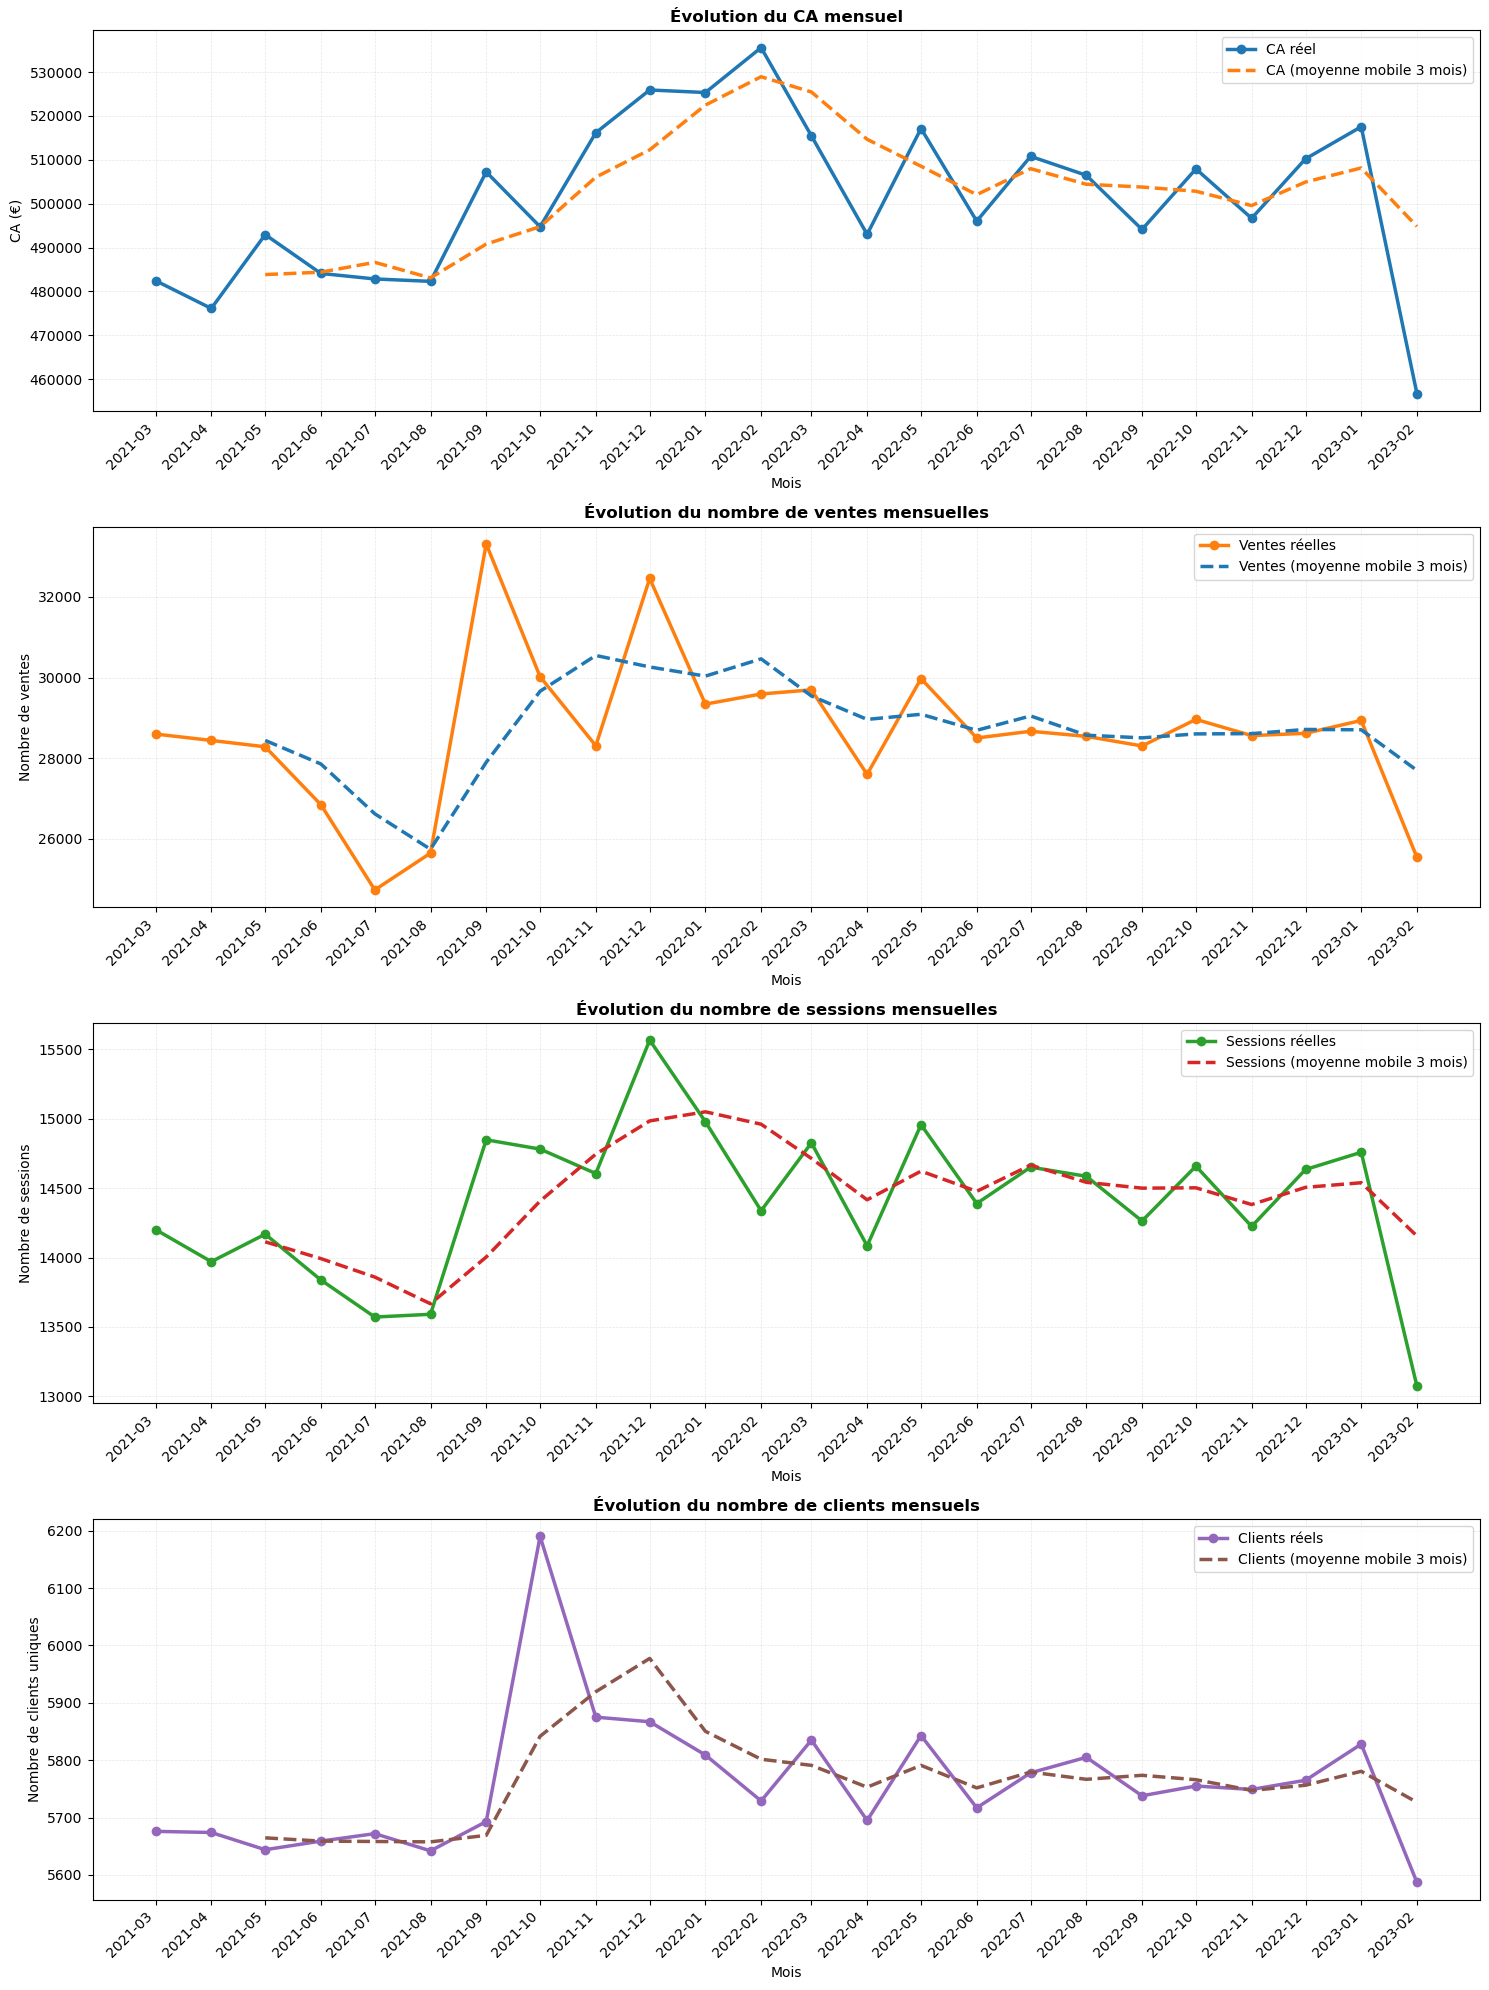

In [ ]:
# Fonction pour afficher les évolutions mensuelles sur les deux années

# Importation de la fonction associée
from fonctions import evolutions_mensuelles_sur_deux_annees
evolutions_mensuelles_sur_deux_annees(donnees)

### Nous pouvons noter qu'il y a un **grand pic suivi d'une baisse** conséquente au niveau des **ventes** et du nombre de **clients mensuels** pour le mois d'**octobre 2021**.

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="#2-2-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.2.2 - Evolution mensuelles dans une année civile</h4>
</div>

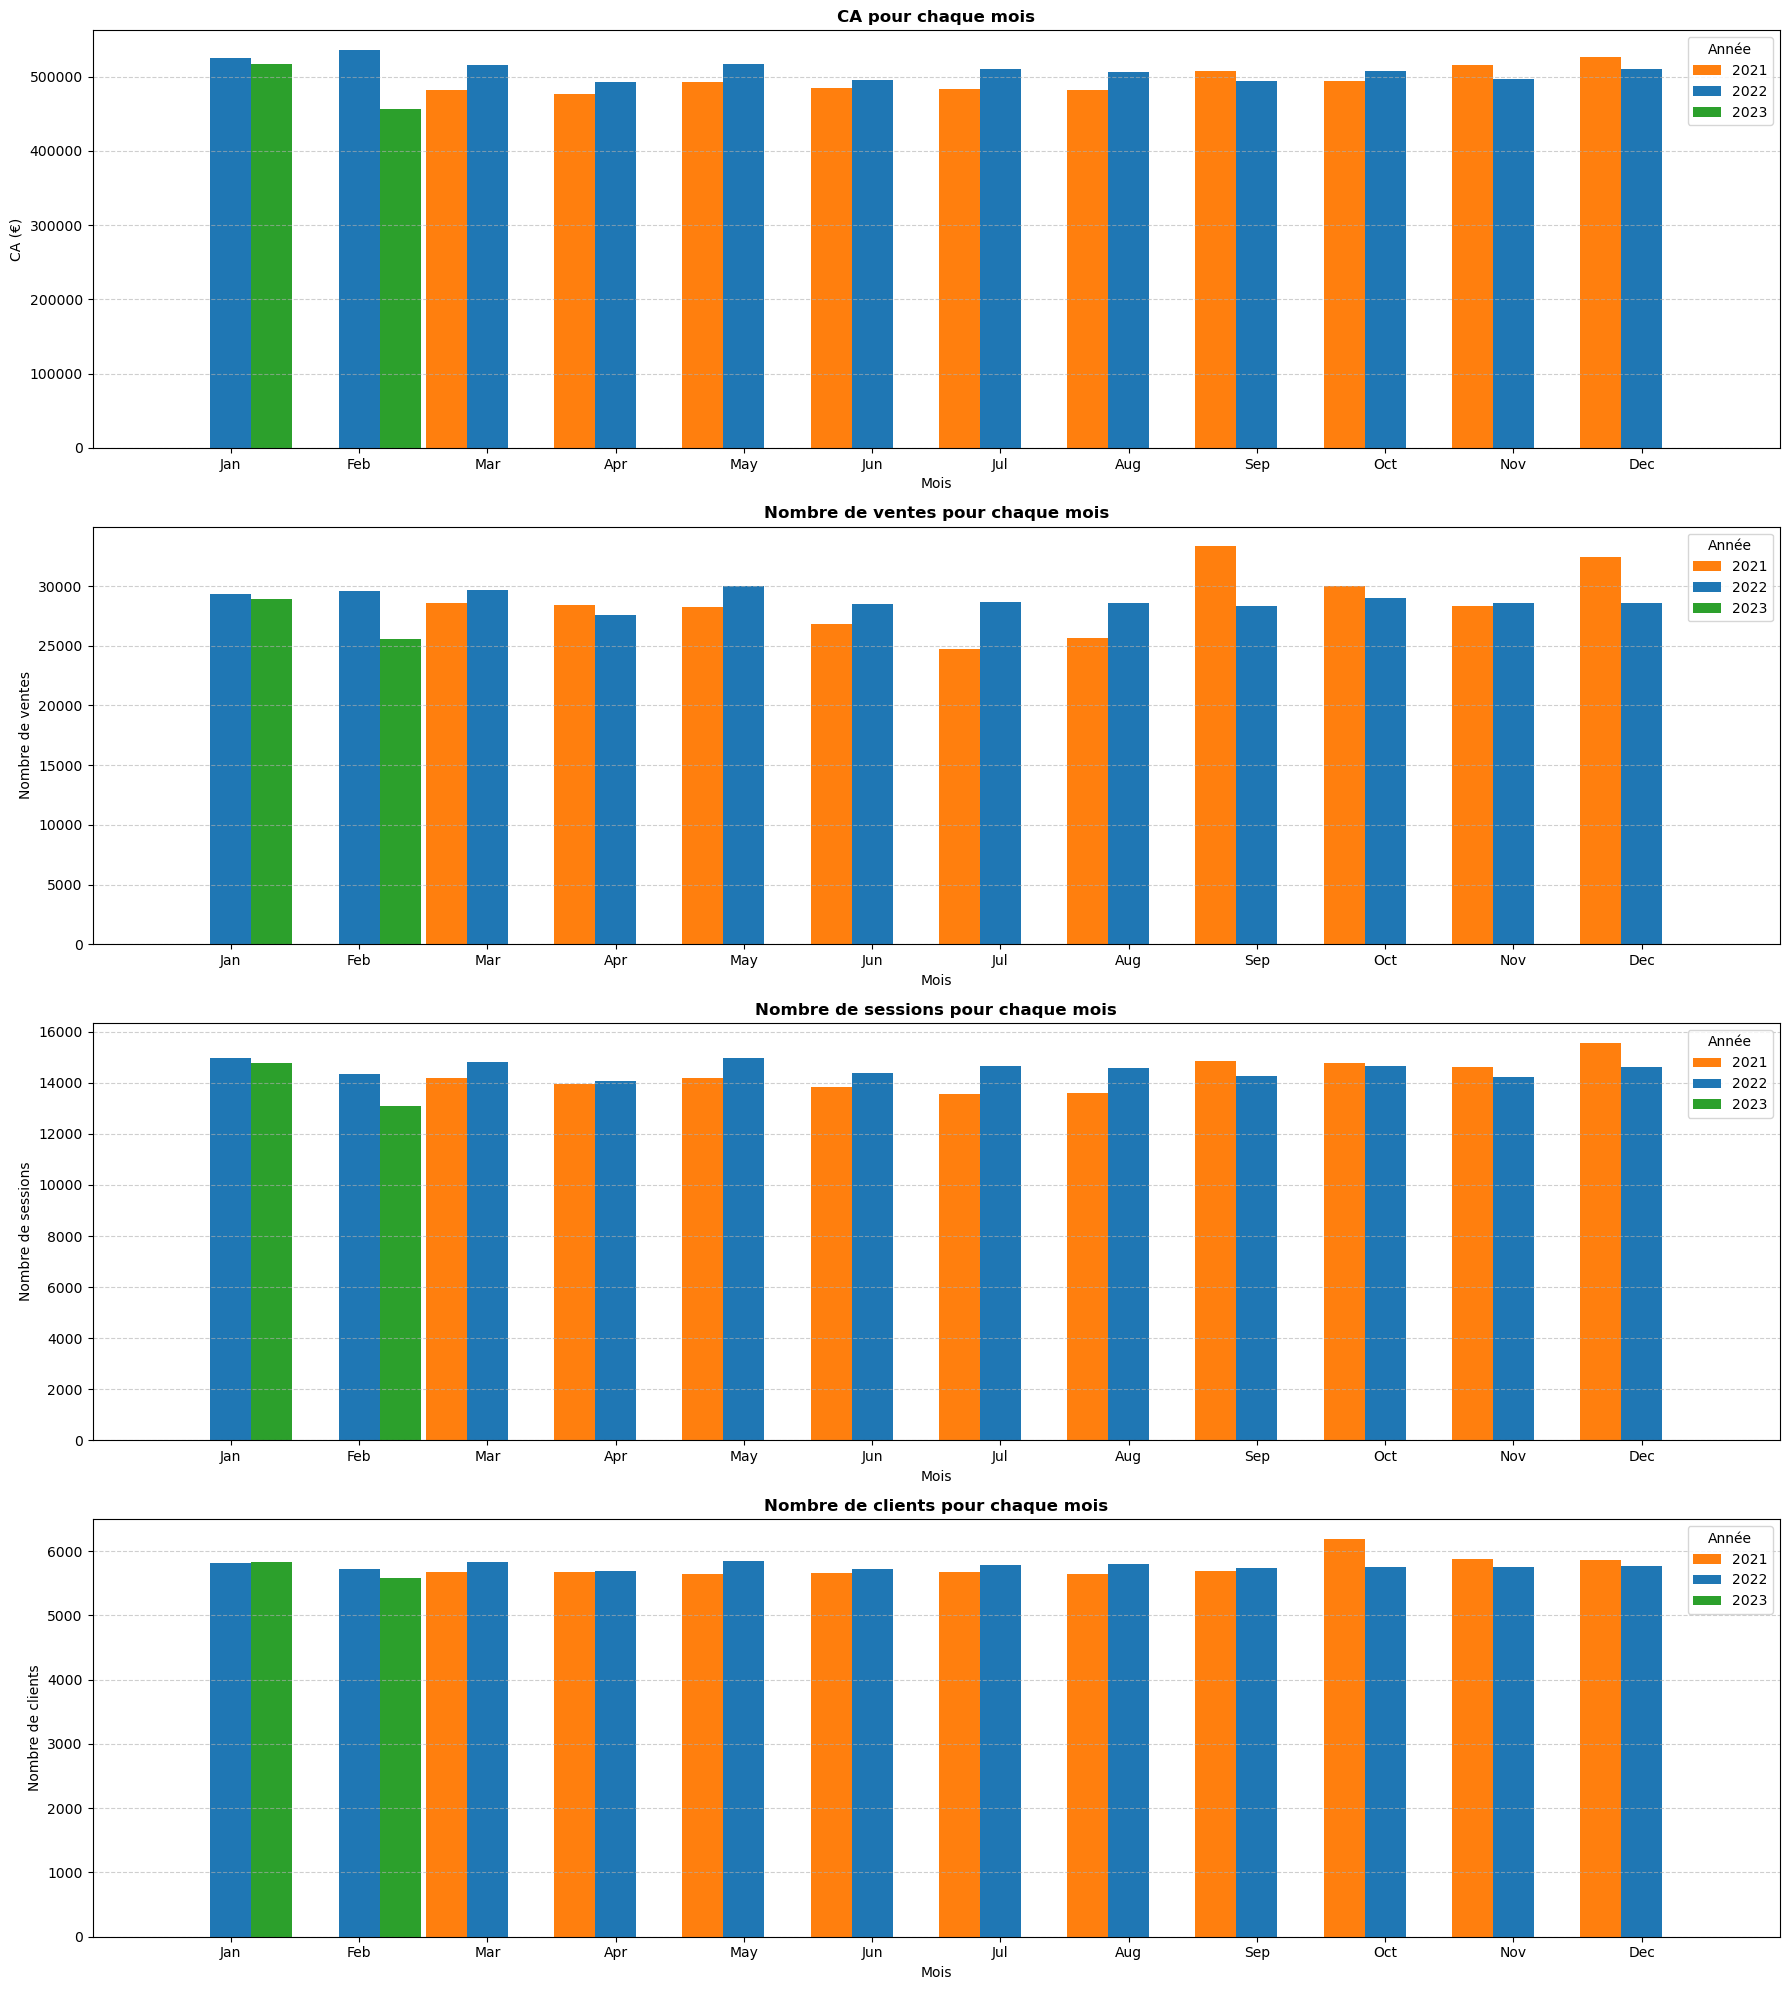

In [ ]:
# Fonction pour afficher les évolutions mensuelles dans une année civile

# Importation de la fonction associée
from fonctions import evolutions_mensuelles_annee_civile
evolutions_mensuelles_annee_civile(donnees)

##### Nous pouvons constater une **légère baisse** de **tous les indicateurs** pour le **début de l'année 2023**.

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="2-2-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.2.3 - Evolution quotidienne sur les deux années</h4>
</div>

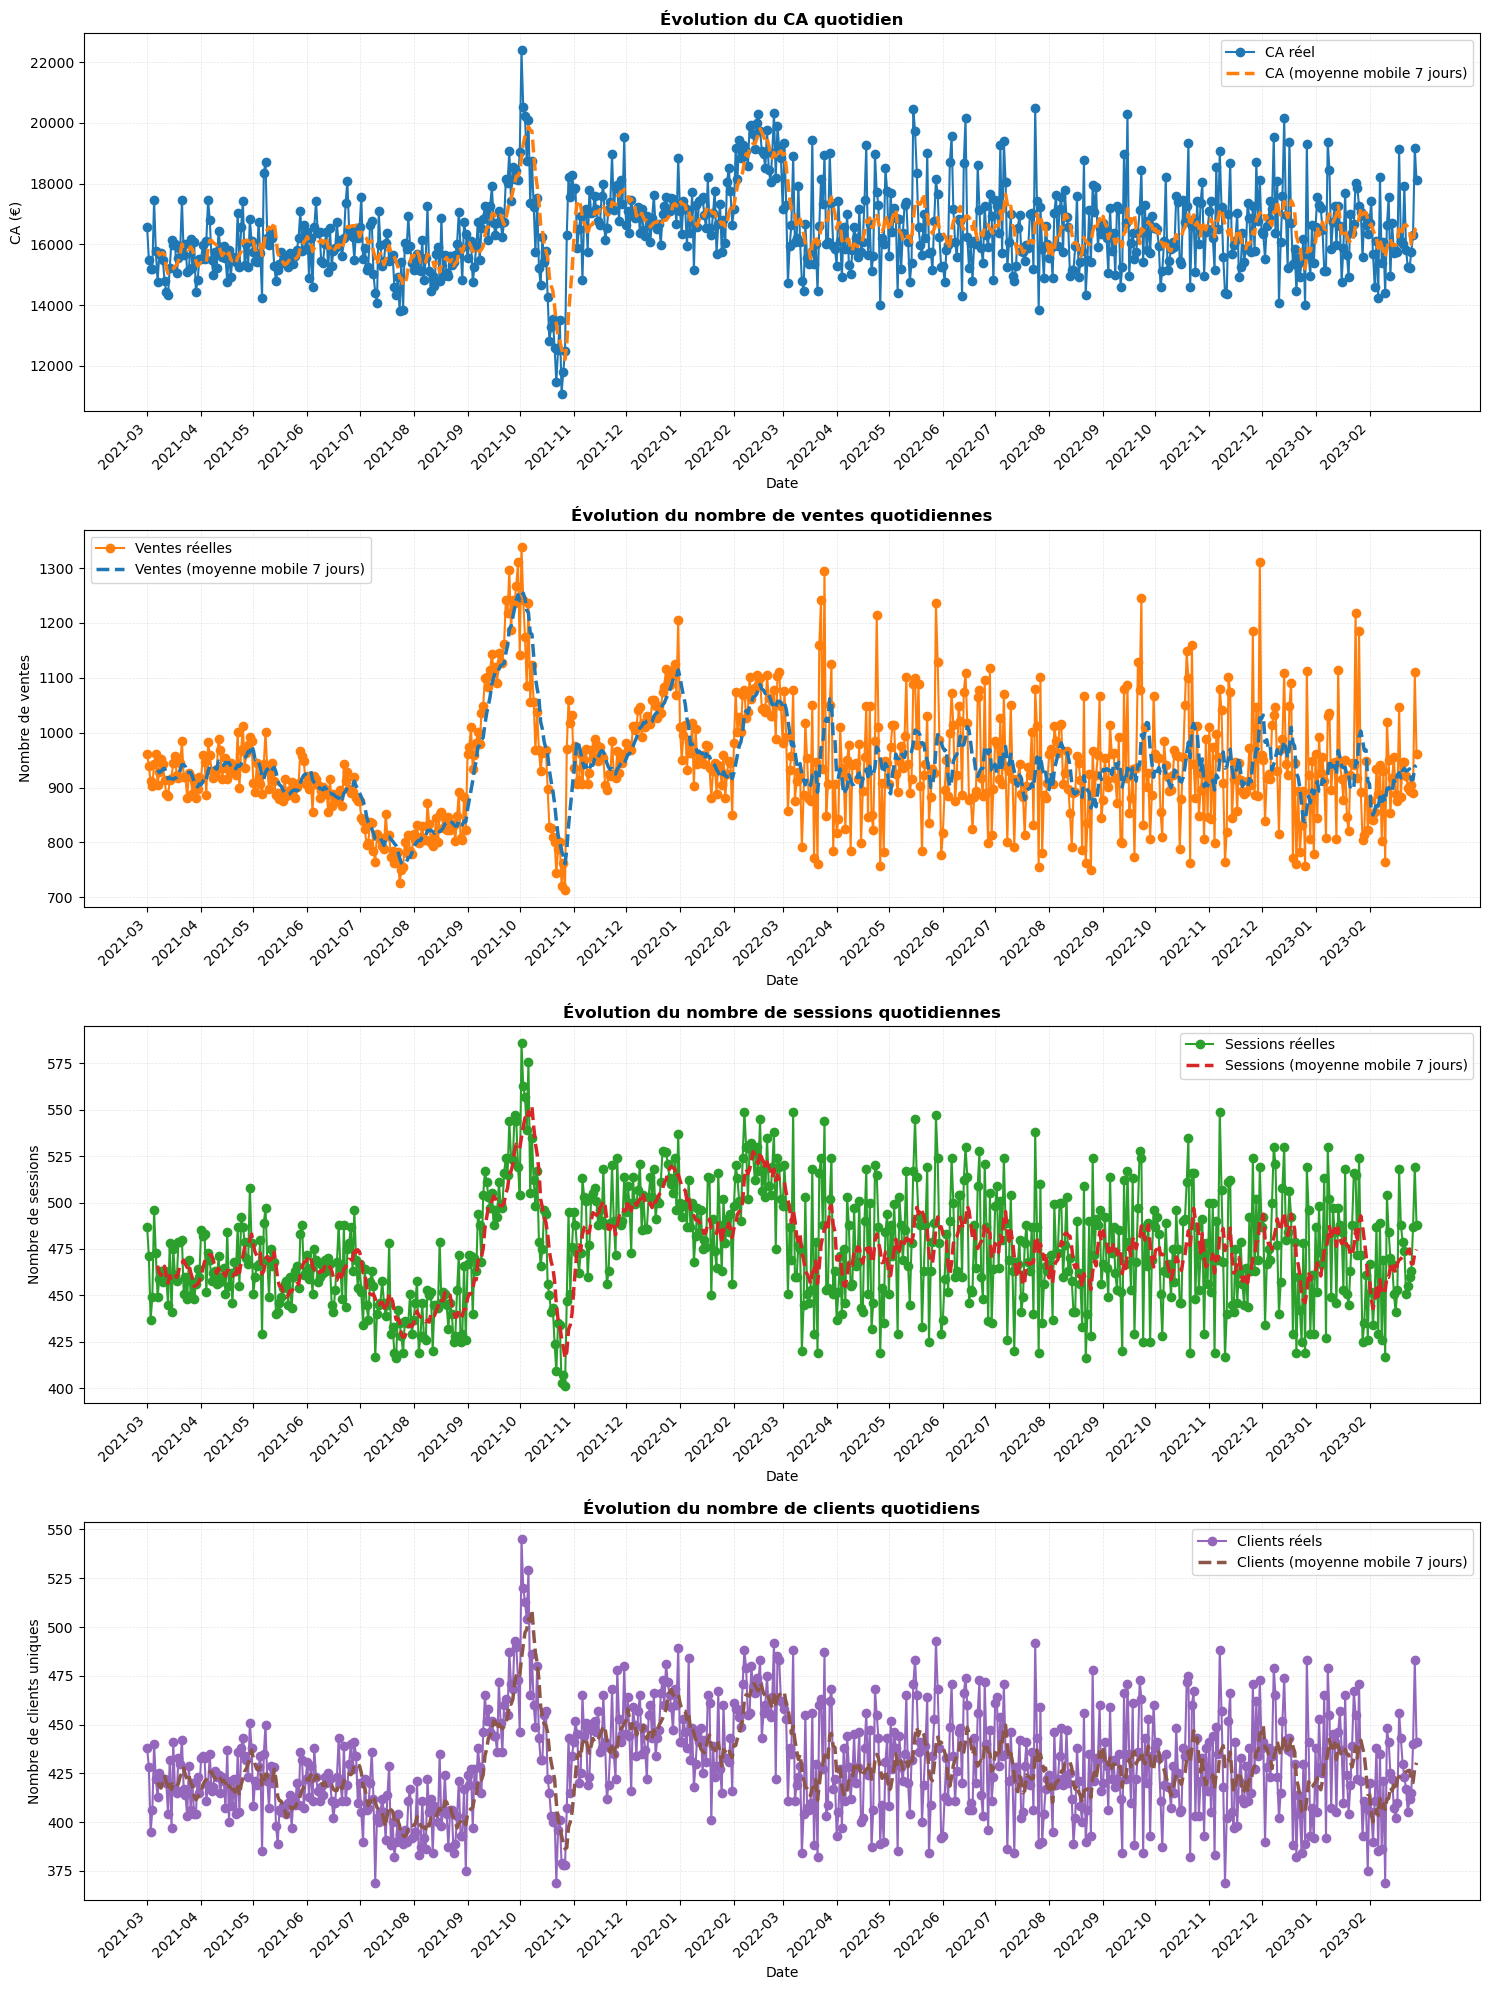

In [ ]:
# Fonction pour afficher les évolutions quotidiennes sur les deux années

# Importation de la fonction associée
from fonctions import evolution_quotidienne_moyenne_mobile
evolution_quotidienne_moyenne_mobile(donnees)

#### Ces graphiques nous confirment qu'il se passe quelque chose au mois d'**octobre 2021**.

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="2-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">2.3 - Zoom sur le mois d'octobre 2021</h4>
</div>

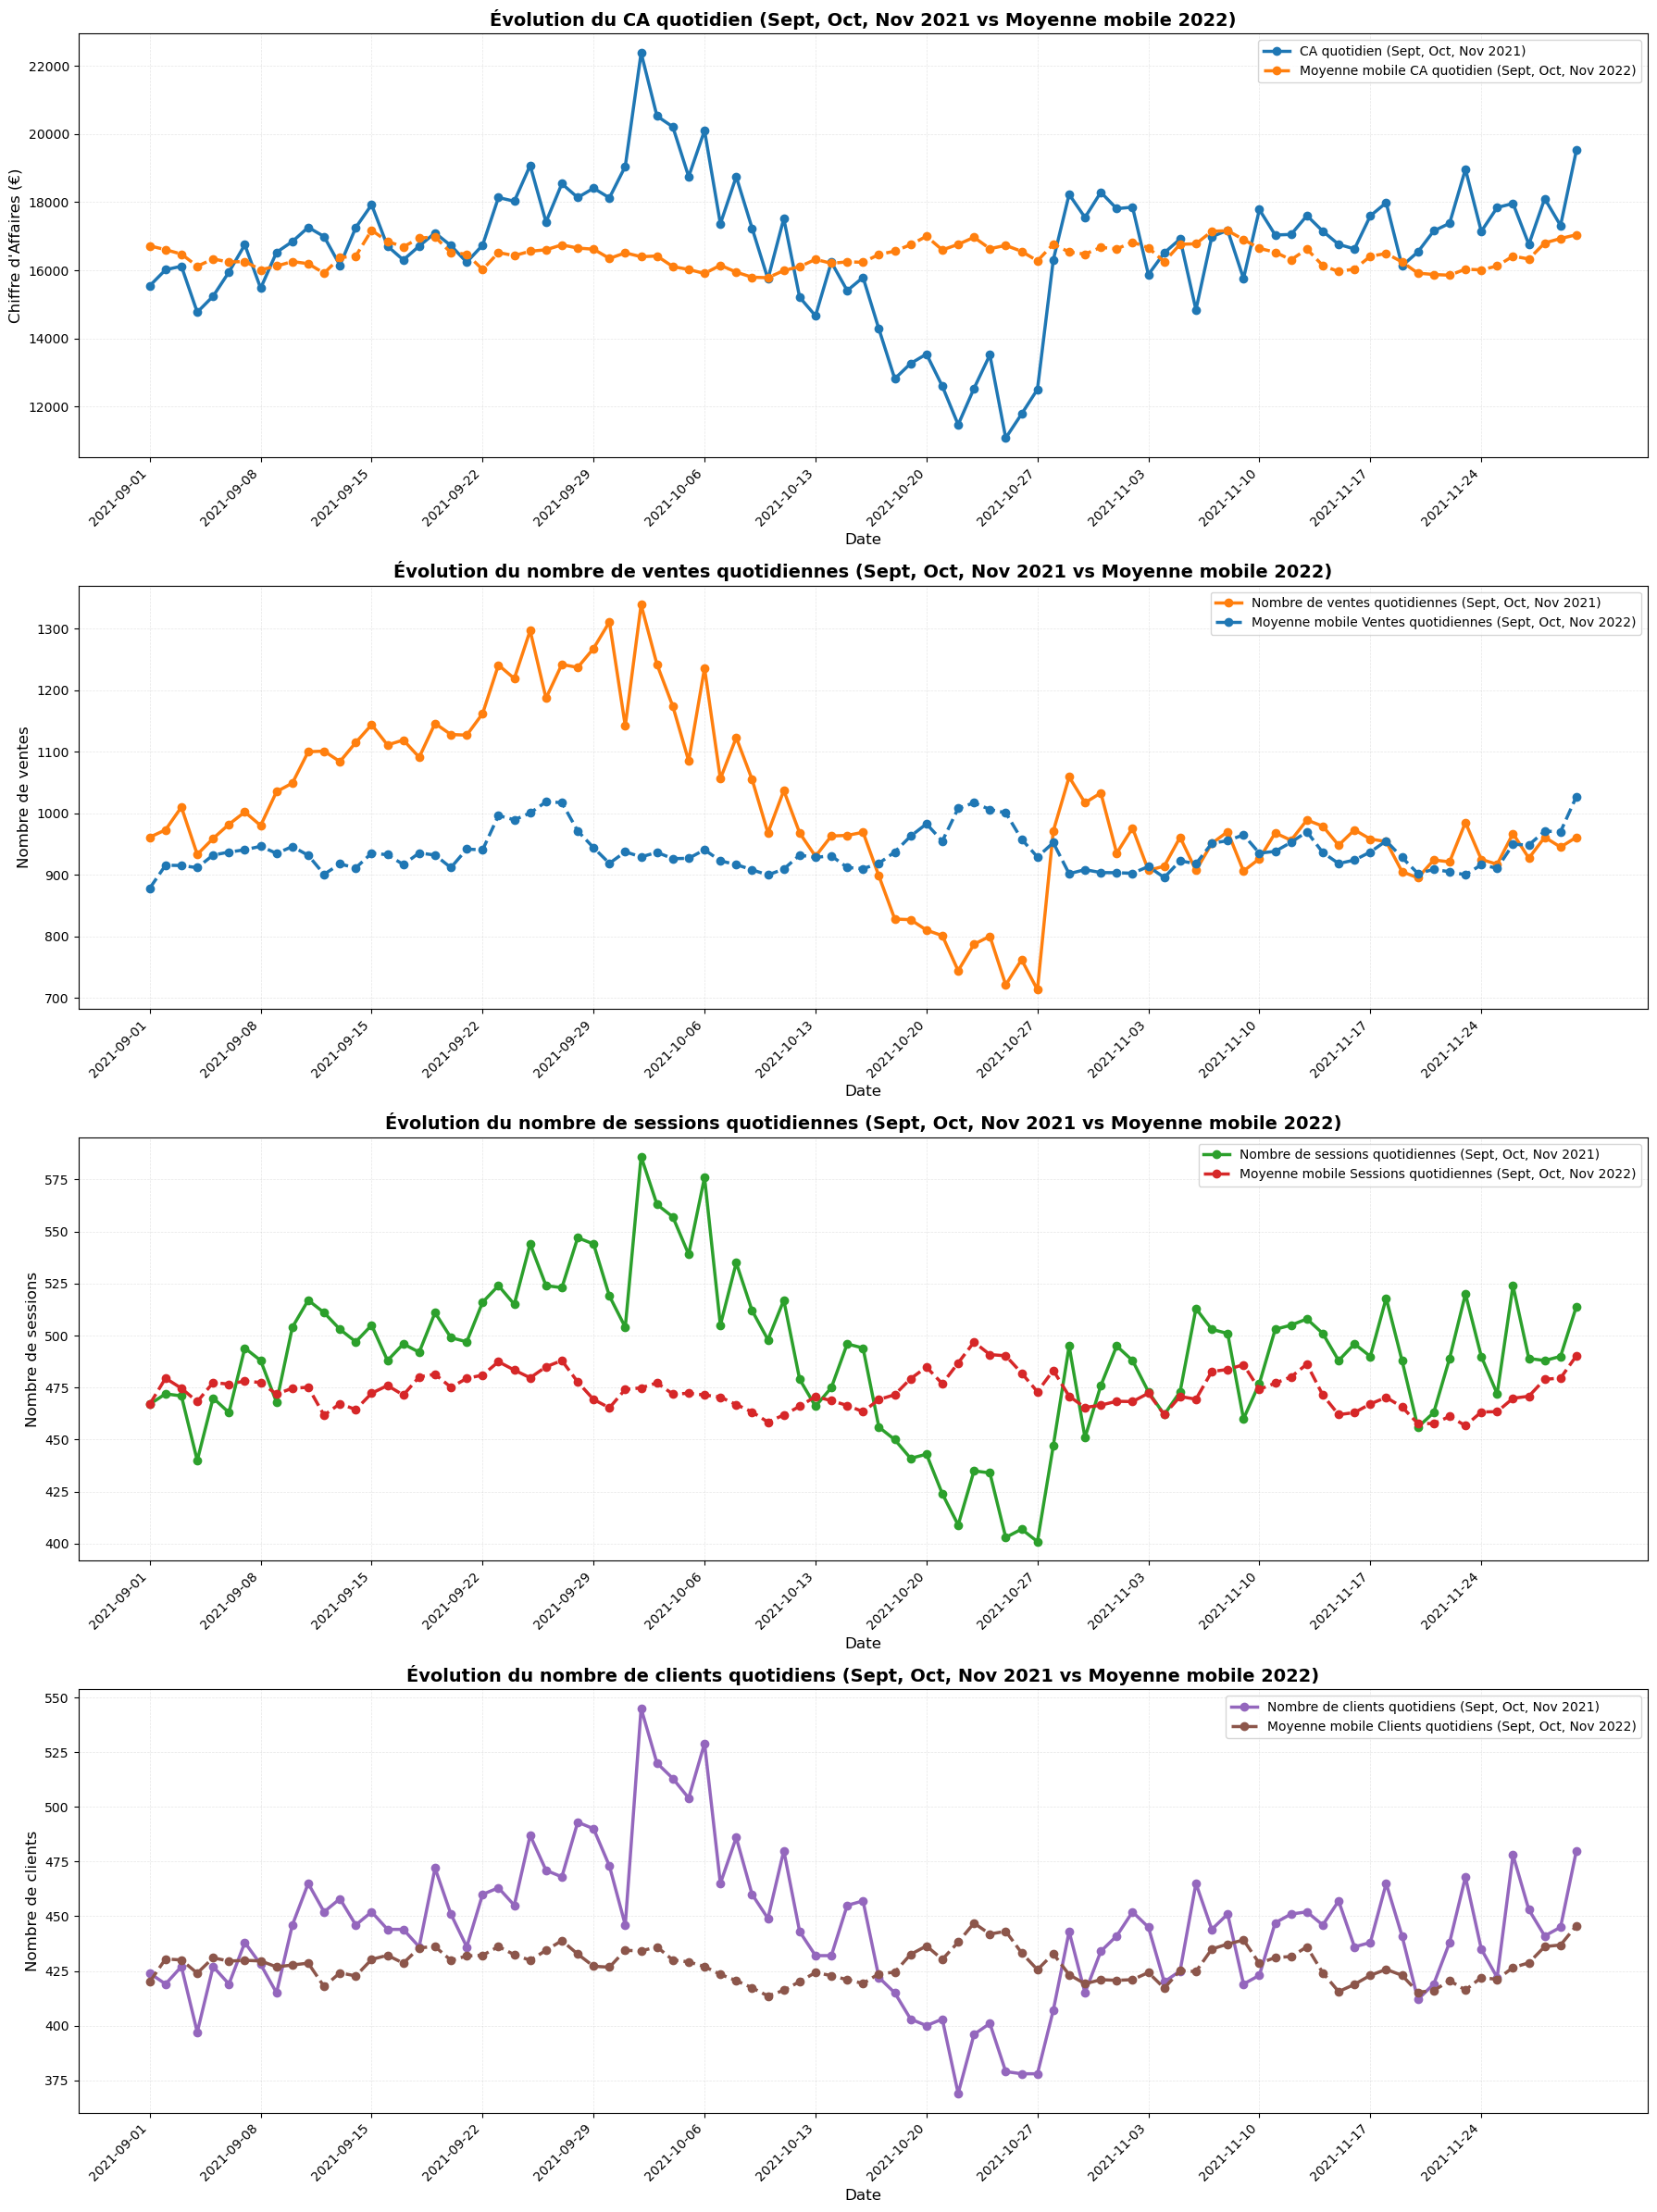

In [ ]:
# Fonction pour afficher un zoom sur le mois d'octobre 2021

# Importation de la fonction associée
from fonctions import zoom_octobre_2021
zoom_octobre_2021(donnees)

##### **Tous les indicateurs augmentent légèrement courant septembre 2021**, puis il y a un **pic au 2 octobre 2021**. Ensuite, tous nos indicateurs montrent **une baisse continue jusqu'au 27 octobre 2021**.

<div style="background-color: RGB(255,184,100);" >
<h2 id="etape-3" style="margin: auto; padding: 20px; ">Etape 3 - Tops et flops</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
<h3 id="3-1"style="margin: auto; padding: 20px; color: RGB(255,184,100); ">3.1 - Les tops</h3>
</div>

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="3-1-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.1.1 - TOP 10 clients</h4>
</div>

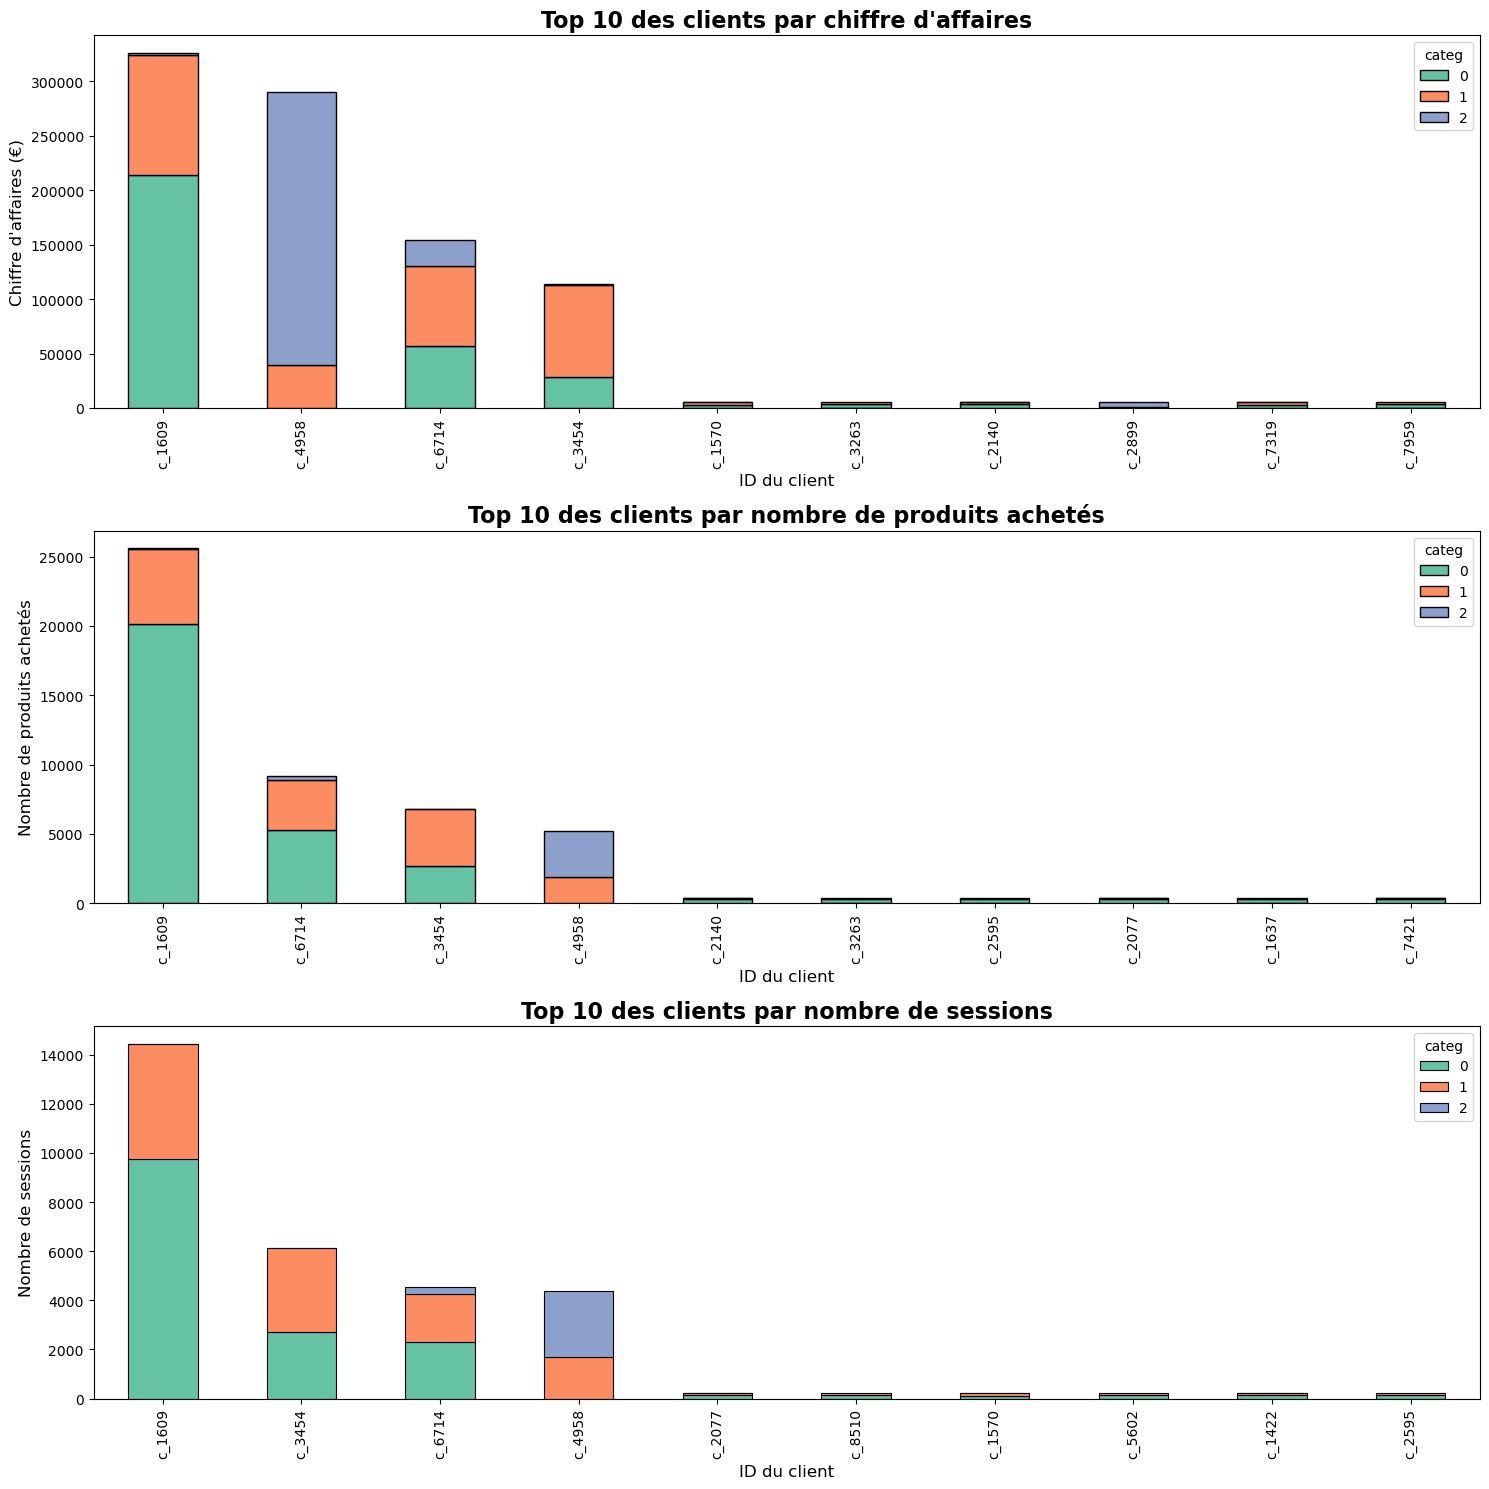

In [ ]:
# Afficher le TOP 10 des clients

# Importation de la fonction associée
from fonctions import top_10
top_10_resultats_clients = top_10(donnees, type_resultat="clients")

##### Nous remarquons qu'il y a une **grande différence entre les 4 premiers clients**, pour lesquels les indicateurs sont très élevés, **et les autres**. Ce sont certainement les **clients BtoB**.

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="3-1-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.1.2 - TOP 10 produits</h4>
</div>

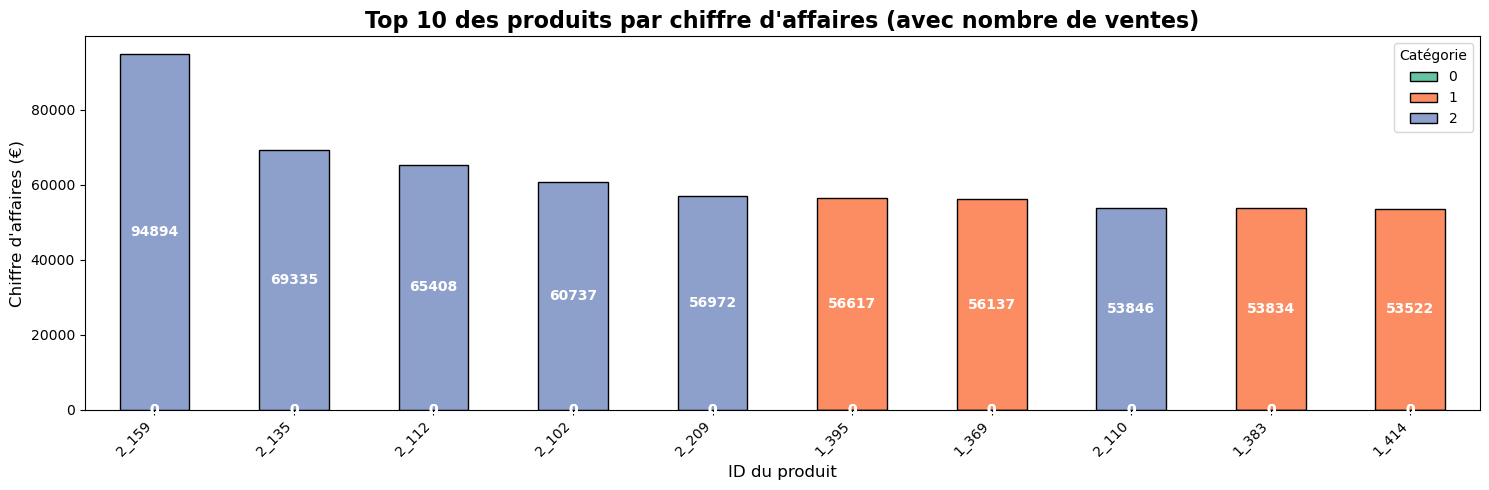

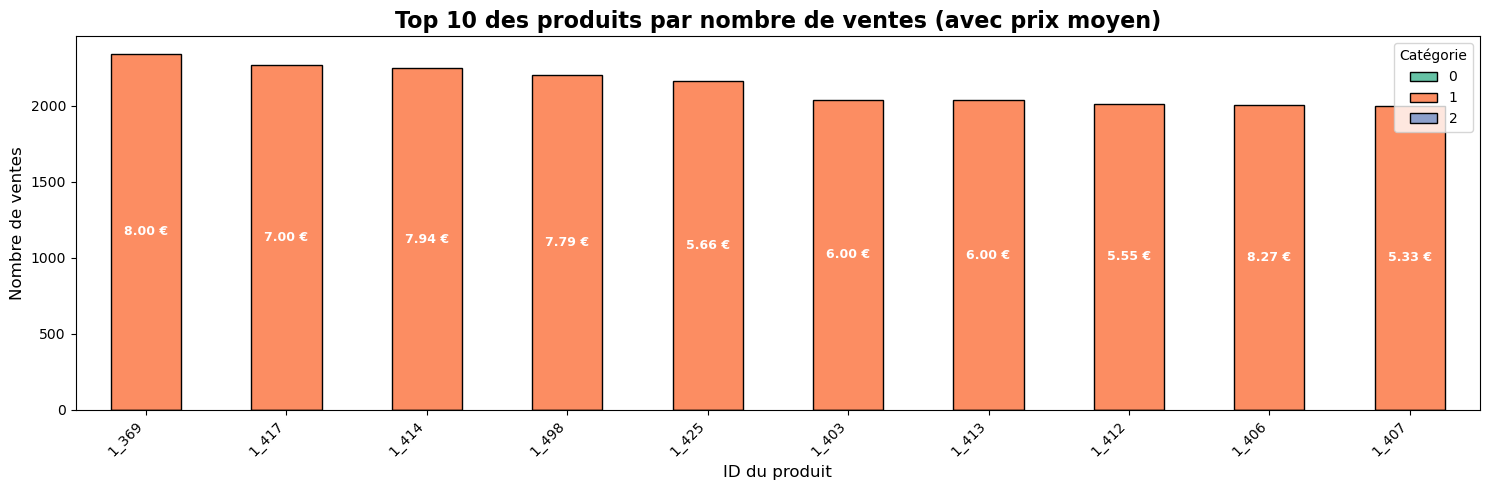

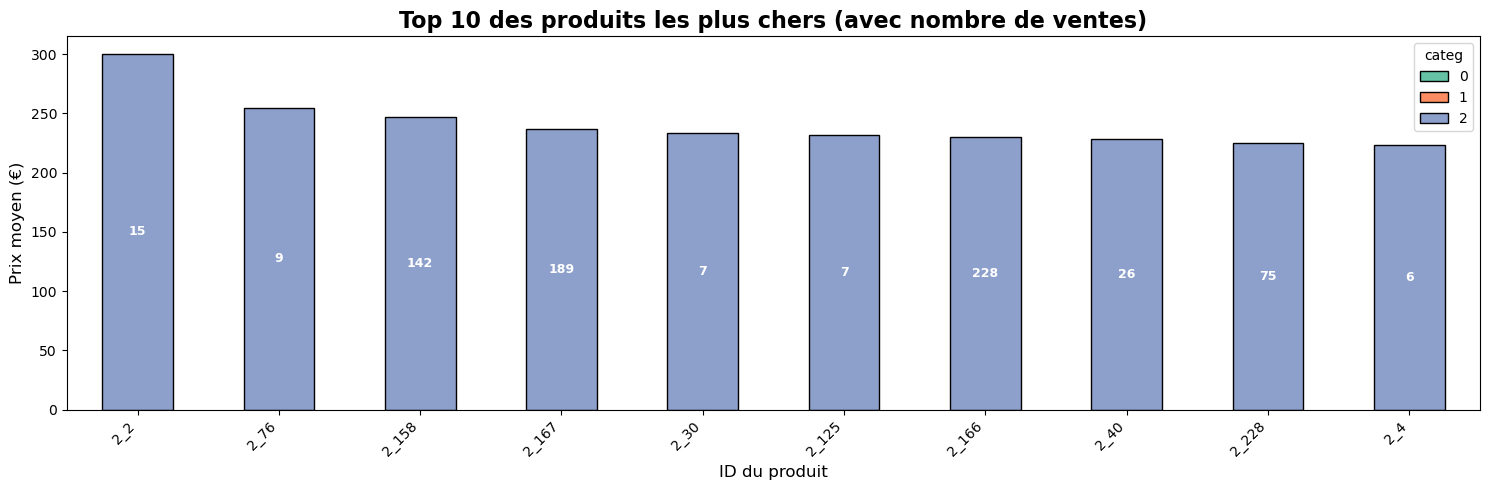

In [ ]:
# Afficher le TOP 10 des produits

# Importation de la fonction associée
from fonctions import top_produits
top_produits(donnees)

##### Les produits **les plus vendus** sont ceux de la **catégorie 1**. **Les plus chers et ceux qui rapportent le plus** sont ceux de la **catégorie 2**.

<div style="border: 1px solid RGB(255,184,100);" >
<h3 id="3-2" style="margin: auto; padding: 20px; color: RGB(255,184,100); ">3.2 - Les flops</h3>
</div>

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="3-2-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.2.1 - FLOP 10 clients</h4>
</div>

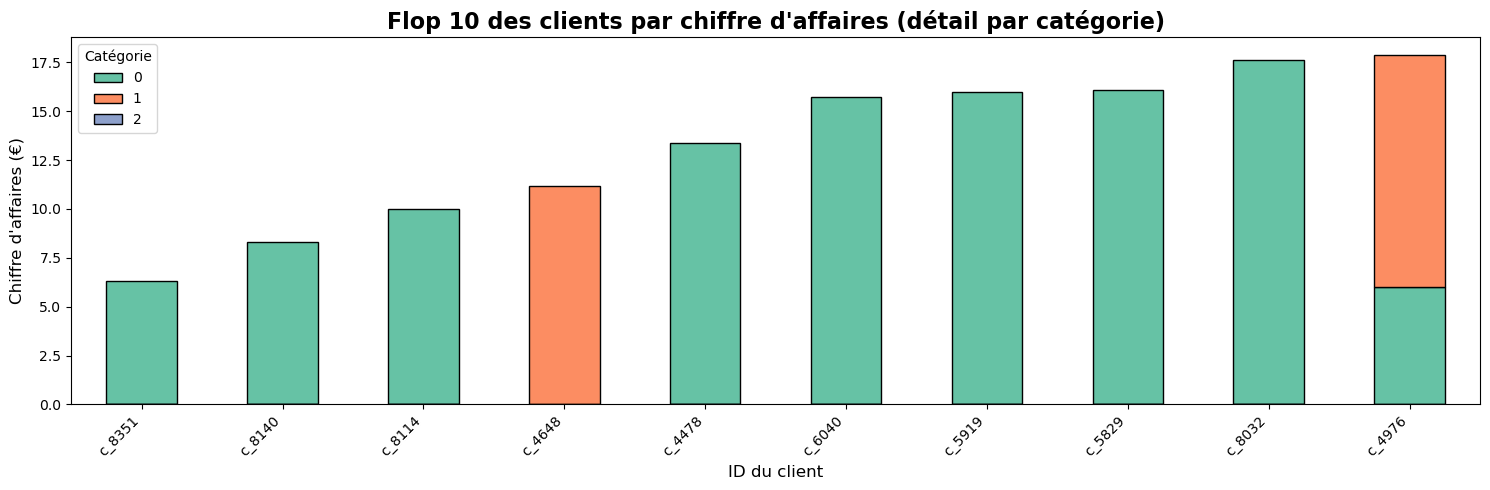

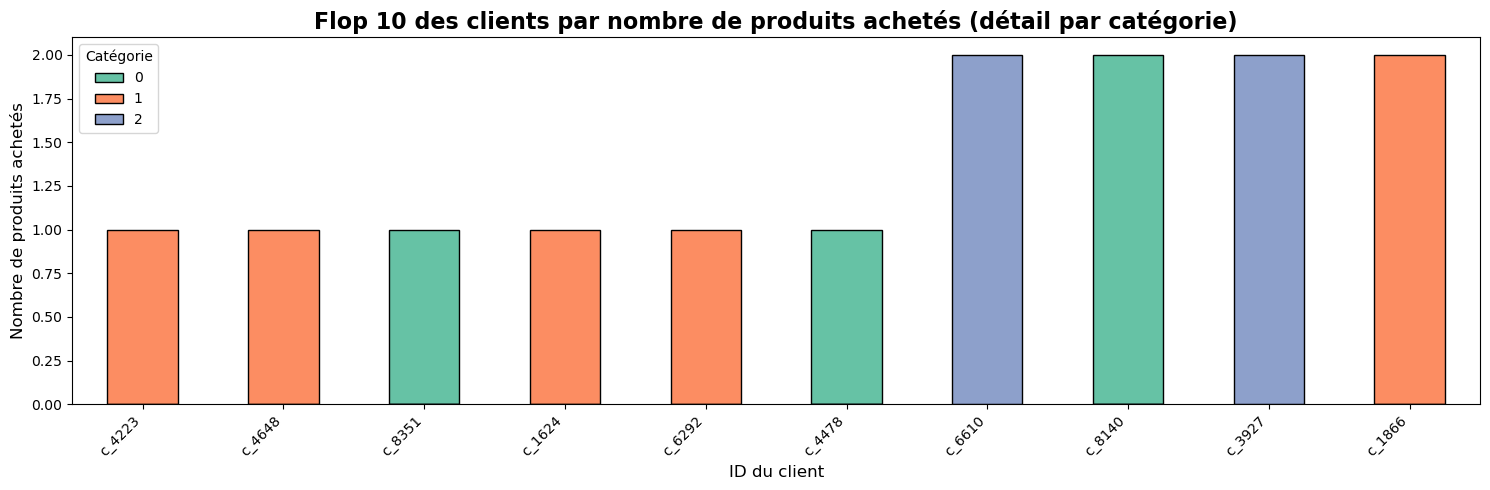

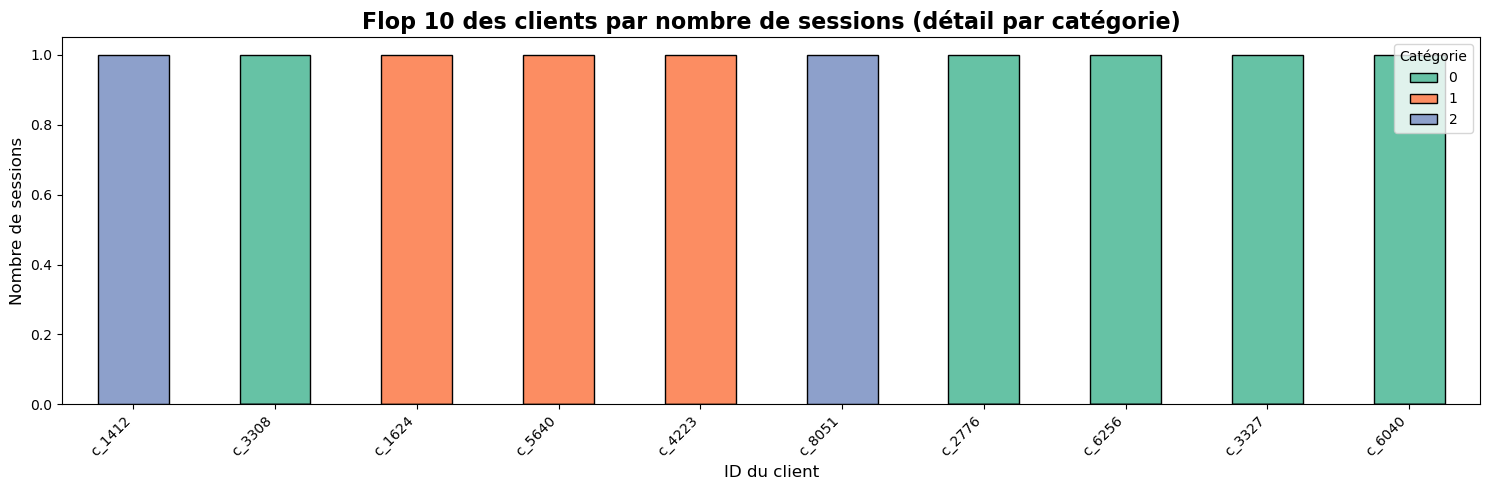

In [ ]:
# Afficher le FLOP 10 des clients

# Importation de la fonction associée
from fonctions import flop_clients
flop_clients(donnees)

##### Les clients qui génèrent **le moins de chiffre d'affaires** commandent majoritairement des **produits de catégorie 0**.

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="3-2-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">3.2.2 - FLOP 10 produits</h4>
</div>

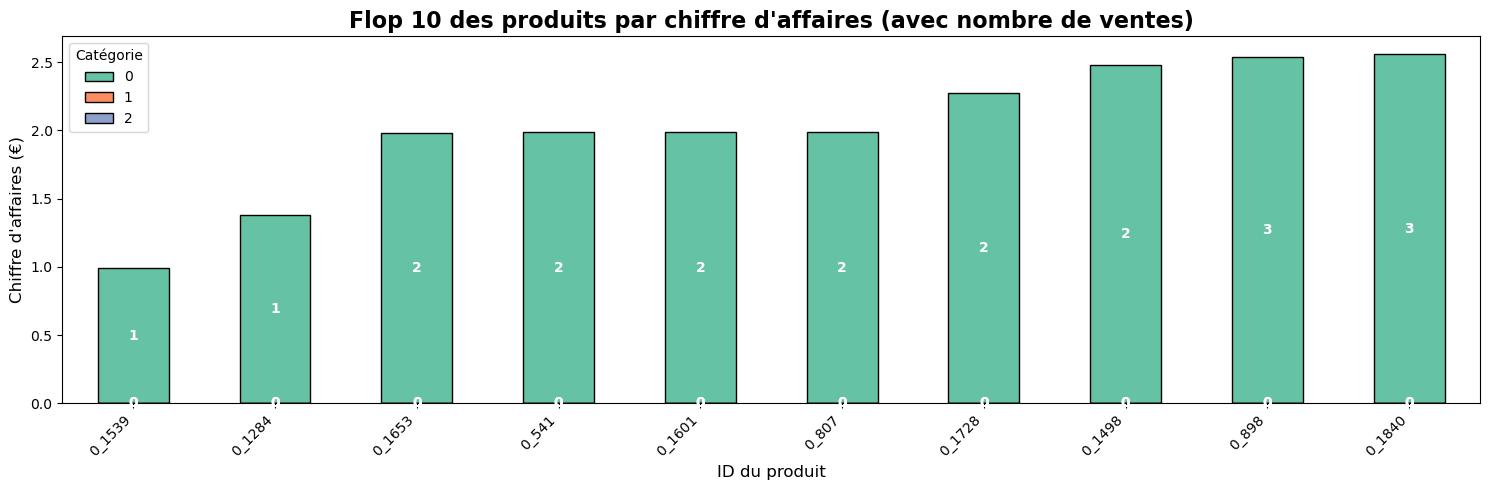

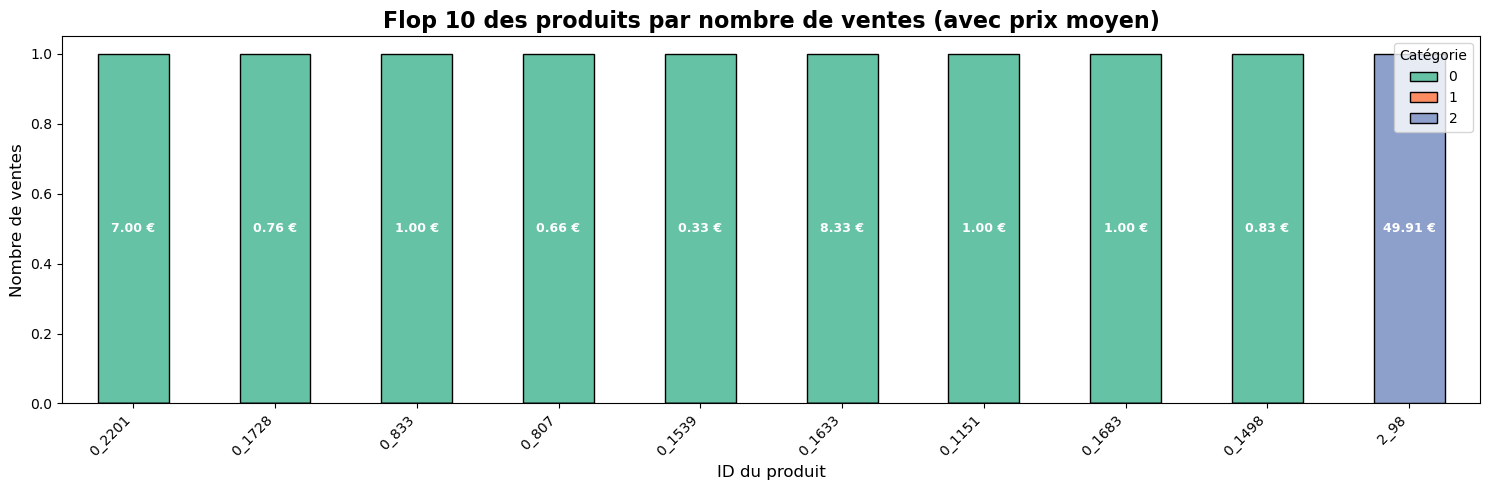

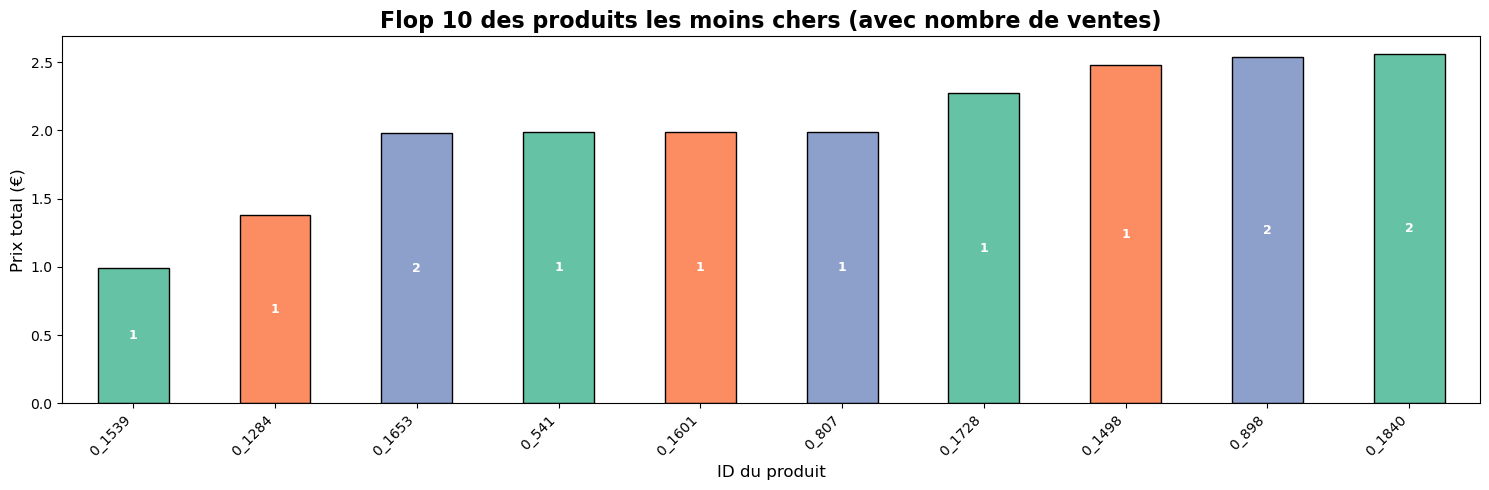

In [ ]:
# Afficher le FLOP 10 des produits

# Importation de la fonction associée
from fonctions import flop_produits
flop_produits(donnees)

##### Les produits qui génèrent le **moins de chiffre d'affaires et de ventes** sont des **produits de catégorie 0**.

<div style="background-color: RGB(255,184,100);" >
<h2 id="etape-4" style="margin: auto; padding: 20px; ">Etape 4 - Analyses des profils des clients</h2>
</div>

<div style="border: 1px solid RGB(255,184,150);" >
<h3 id="4-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">4.1 - Analyse des clients BtoB</h3>
</div>

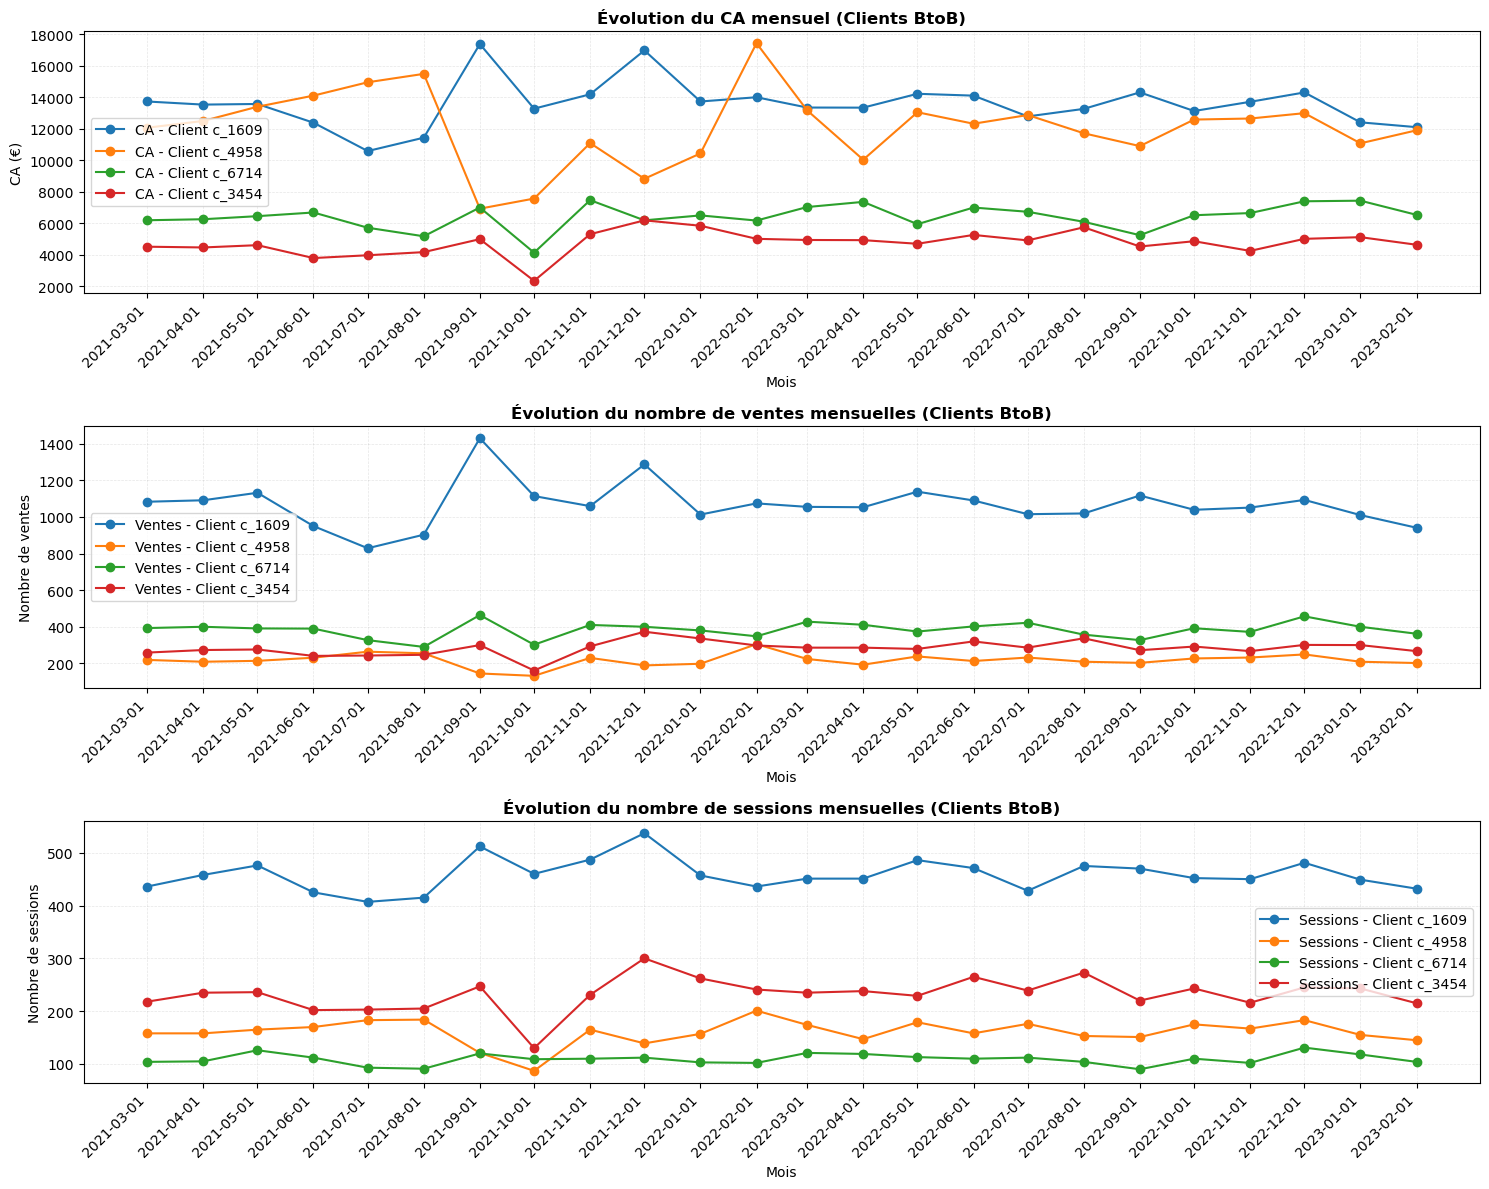

In [ ]:
# Afficher les résultats pour les clients BtoB

# Importation de la fonction associée
from fonctions import evolution_clients_b2b
# Liste des clients BtoB
clients_b2b = ["c_1609", "c_4958", "c_6714", "c_3454"]
# Appel de la fonction avec le DataFrame `donnees` et la liste des clients BtoB
evolution_clients_b2b(donnees, clients_b2b)

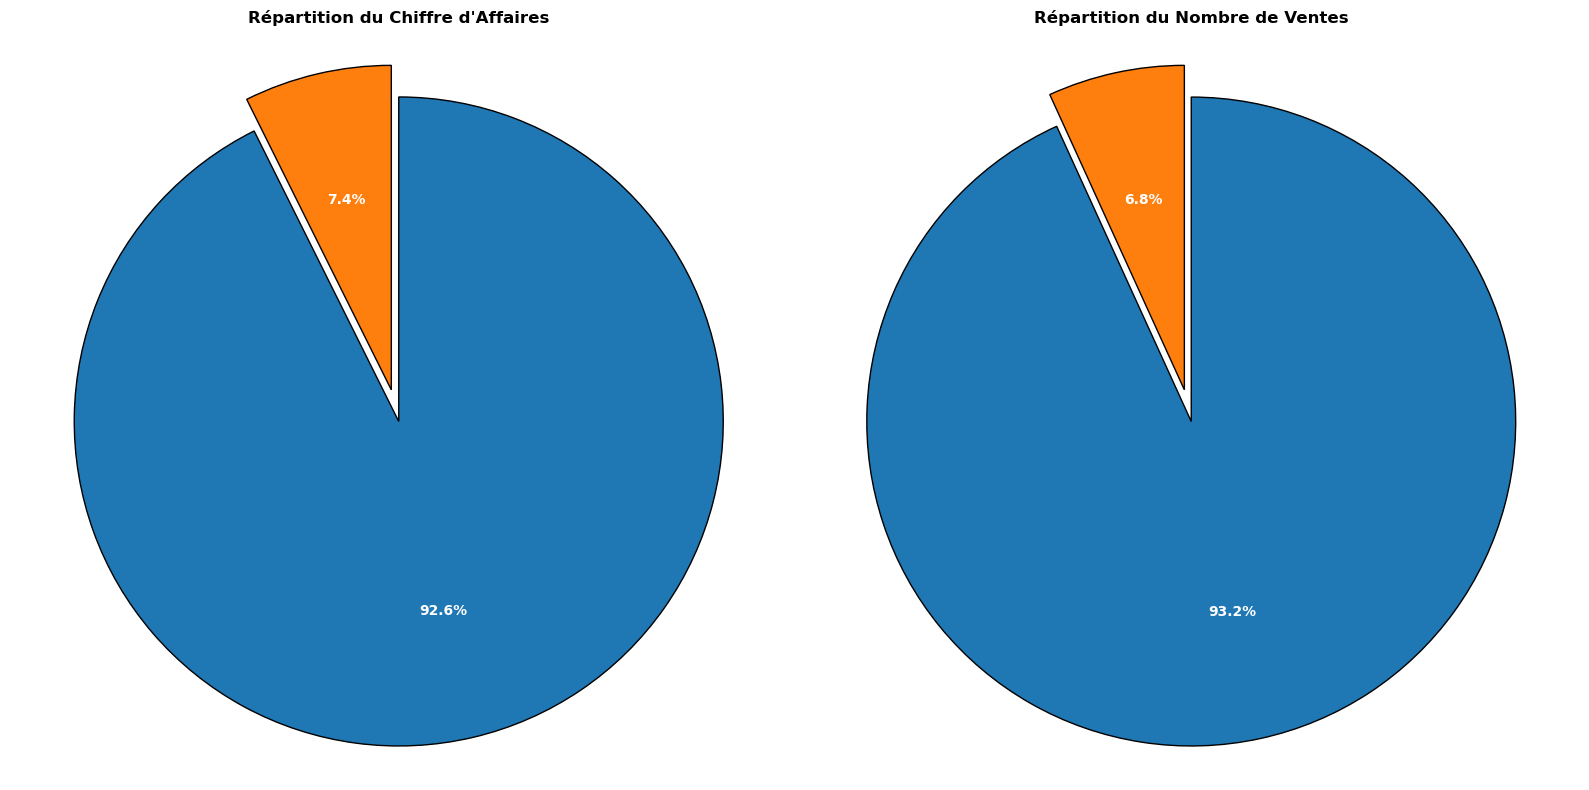

In [ ]:
# Afficher la répartition des résultats des clients BtoB
# Liste des clients BtoB
clients_b2b = ["c_1609", "c_4958", "c_6714", "c_3454"]

# Filtrer les données pour les clients BtoB
donnees_b2b = donnees[donnees['client_id'].isin(clients_b2b)].copy()  # Créez la variable `donnees_b2b`

# Importation de la fonction associée
from fonctions import repartition_ca_ventes

# Appel de la fonction avec le DataFrame `donnees`, `donnees_b2b` et la liste des clients BtoB
repartition_ca_ventes(donnees, donnees_b2b, clients_b2b)

##### Ces **4 clients BtoB** génèrent **7,4 % du CA** et **6,8 % des ventes**.

<div style="border: 1px solid RGB(255,184,150);" >
<h3 id="4-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">4.2 - Courbe de Lorenz</h3>
</div>

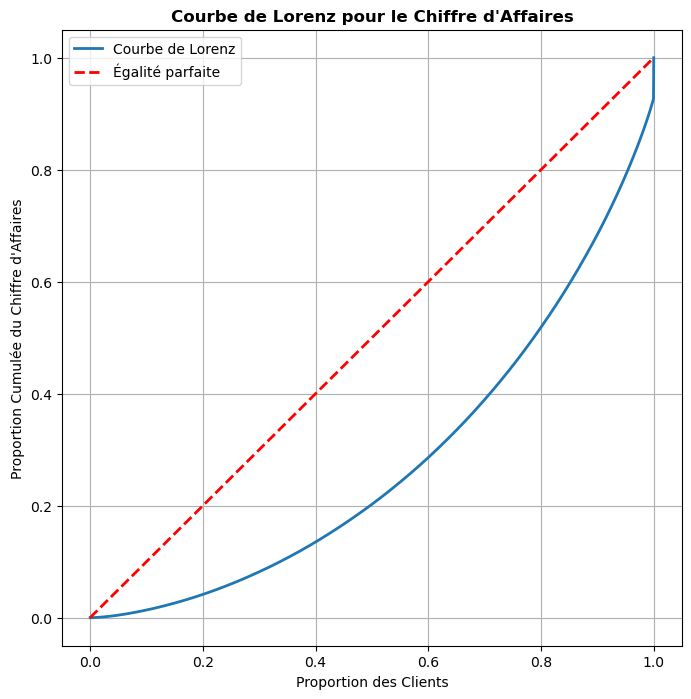

In [ ]:
# Fonction pour tracer la courbe de Lorenz pour le chiffre d'affaires

# Importation de la fonction associée
from fonctions import courbe_lorenz_chiffre_affaires
courbe_lorenz_chiffre_affaires(donnees)

In [ ]:
# Calculer le coefficient de Gini
ca_par_client = donnees.groupby('client_id')['price'].sum()
def corrected_gini(array):
    array = np.array(array)
    if np.any(array < 0):
        raise ValueError("Les valeurs contiennent des nombres négatifs.")
    if len(array) == 0:
        return 0  

    # Trier les valeurs (ordre croissant)
    array = np.sort(array)
    n = len(array)

    # Calculer la somme pondérée des valeurs triées
    cumulative_sum = np.cumsum(array)
    weighted_sum = np.sum((np.arange(1, n + 1) * array))
    
    # Calcul du Gini avec la somme pondérée
    gini = (2 * weighted_sum / (n * array.sum())) - (n + 1) / n
    return round(gini, 2)
# Calculer le coefficient de Gini pour le CA des clients
try:
    corrected_gini_value = corrected_gini(ca_par_client.values)
    print(f"Le coefficient de Gini pour le chiffre d'affaires est : {corrected_gini_value}")
except ValueError as e:
    print(e)

Le coefficient de Gini pour le chiffre d'affaires est : 0.44


##### Sur la**courbe de Lorenz**, nous pouvons voir que **la distribution est inégale** et que les **clients BtoB sont à l'écart**.
##### Le **coefficient de Gini** de 0,44 indique qu'il existe un **inégalité plutôt modérée**


<div style="border: 1px solid RGB(255,184,150);" >
<h3 id="4-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">4.3 - Principe de Pareto</h3>
</div>

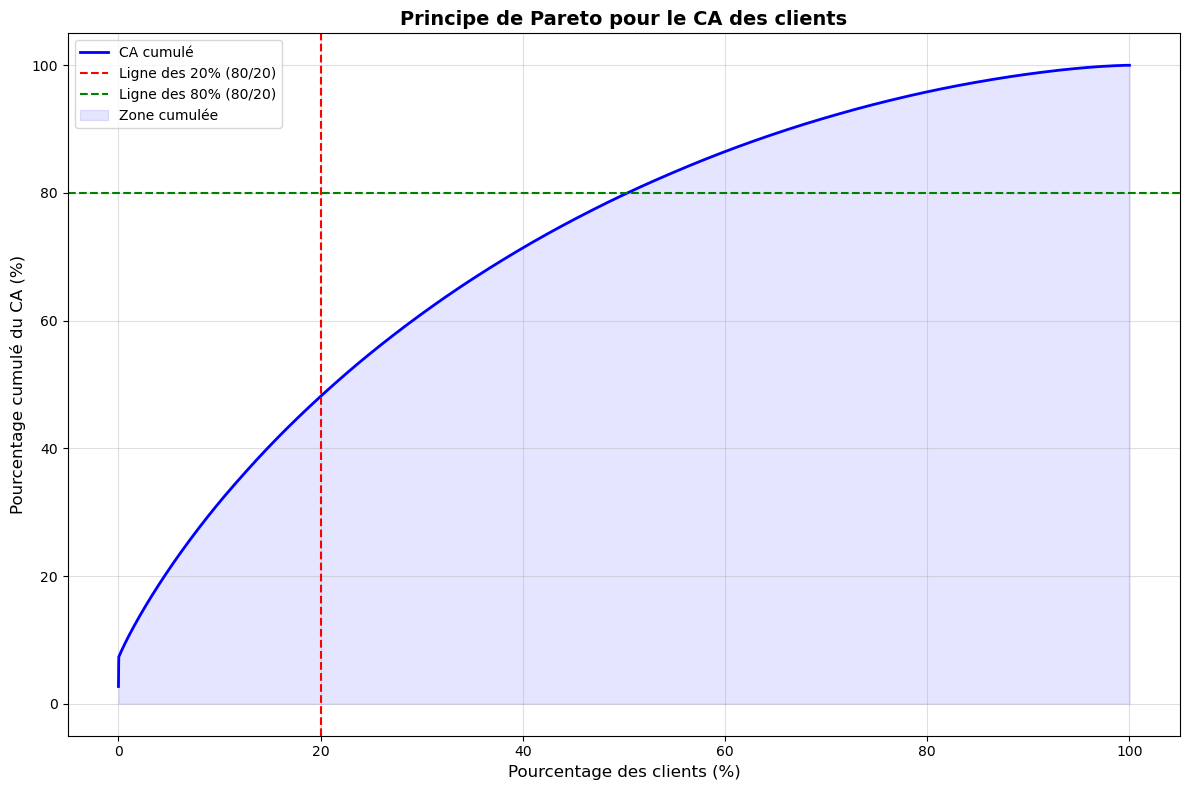

In [ ]:
# Afficher un graphique du principe de Pareto

# Importation de la fonction associée
from fonctions import principe_pareto_chiffre_affaires
principe_pareto_chiffre_affaires(donnees)

##### Sur ce graphique nous pouvons constater que **20 % des clients représentent 50 % du CA**.

<div style="border: 1px solid RGB(255,184,150);" >
<h3 id="4-4" style="margin: auto; padding: 20px; color: RGB(255,184,100);">4.4 - Suppression des clients BtoB</h3>
</div>

In [ ]:
# Supprimer les clients BtoB pour les futures analyses
# Liste des clients BtoB
clients_b2b = ["c_1609", "c_4958", "c_6714", "c_3454"]

# Supprimer les lignes des clients BtoB de la DataFrame 'donnees'
donnees = donnees[~donnees['client_id'].isin(clients_b2b)]

# Vérification
print(f"DataFrame mise à jour. Nombre de clients uniques : {donnees['client_id'].nunique()}")

DataFrame mise à jour. Nombre de clients uniques : 8596


##### Les clients BtoB sont désormais exclus de nos données afin qu'ils ne faussent pas les futures analyes.

<div style="background-color: RGB(255,184,100);" >
<h2 id="etape-5" style="margin: auto; padding: 20px; ">Etape 5 - Analyses par segments</h2>
</div>

<div style="border: 1px solid RGB(255,184,100);" >
<h3 id="5-1" style="margin: auto; padding: 20px; color: RGB(255,184,100); ">5.1 - Répartition selon les catégories </h3>
</div>

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="5-1-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">5.1.1 - Analyse chiffrée</h4>
</div>

In [ ]:
# Afficher les analyses chiffrées
# Filtrer les données pour la première année (mars 2021 - février 2022)
donnees_premiere_annee = donnees[(donnees['année'] == 2021) & (donnees['mois'] >= 3) | (donnees['année'] == 2022) & (donnees['mois'] <= 2)]
# Filtrer les données pour la seconde année (mars 2022 - février 2023)
donnees_seconde_annee = donnees[(donnees['année'] == 2022) & (donnees['mois'] >= 3) | (donnees['année'] == 2023) & (donnees['mois'] <= 2)]
# Appeler la fonction après avoir défini les données filtrées
from fonctions import afficher_indicateurs_par_groupe
# Analyser par "categ"
afficher_indicateurs_par_groupe(donnees_premiere_annee, donnees_seconde_annee, "categ")


--- Categ 1 ---
Première année commerciale (mars 2021 - février 2022):
- CA total (€) : 2272254.21
- Nombre de commandes : 85095
- Nombre de produits vendus : 110882
- Produits par commande : 1.30
- Panier moyen (€) : 26.70

Seconde année commerciale (mars 2022 - février 2023):
- CA total (€) : 2247847.65
- Nombre de commandes : 86778
- Nombre de produits vendus : 109723
- Produits par commande : 1.26
- Panier moyen (€) : 25.90

Évolutions entre les deux années:
- Évolution CA total (€) : -1.07%
- Évolution Nombre de commandes : 1.98%
- Évolution Nombre de produits vendus : -1.05%
- Évolution Produits par commande : -2.96%
- Évolution Panier moyen (€) : -2.99%

--- Categ 0 ---
Première année commerciale (mars 2021 - février 2022):
- CA total (€) : 2078274.77
- Nombre de commandes : 105600
- Nombre de produits vendus : 195395
- Produits par commande : 1.85
- Panier moyen (€) : 19.68

Seconde année commerciale (mars 2022 - février 2023):
- CA total (€) : 2040925.92
- Nombre de commandes

##### L'évolution de la catégorie 2 est positive, celle de la catégorie 0 est négative.

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="5-1-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">5.1.2 - Répartition</h4>
</div>

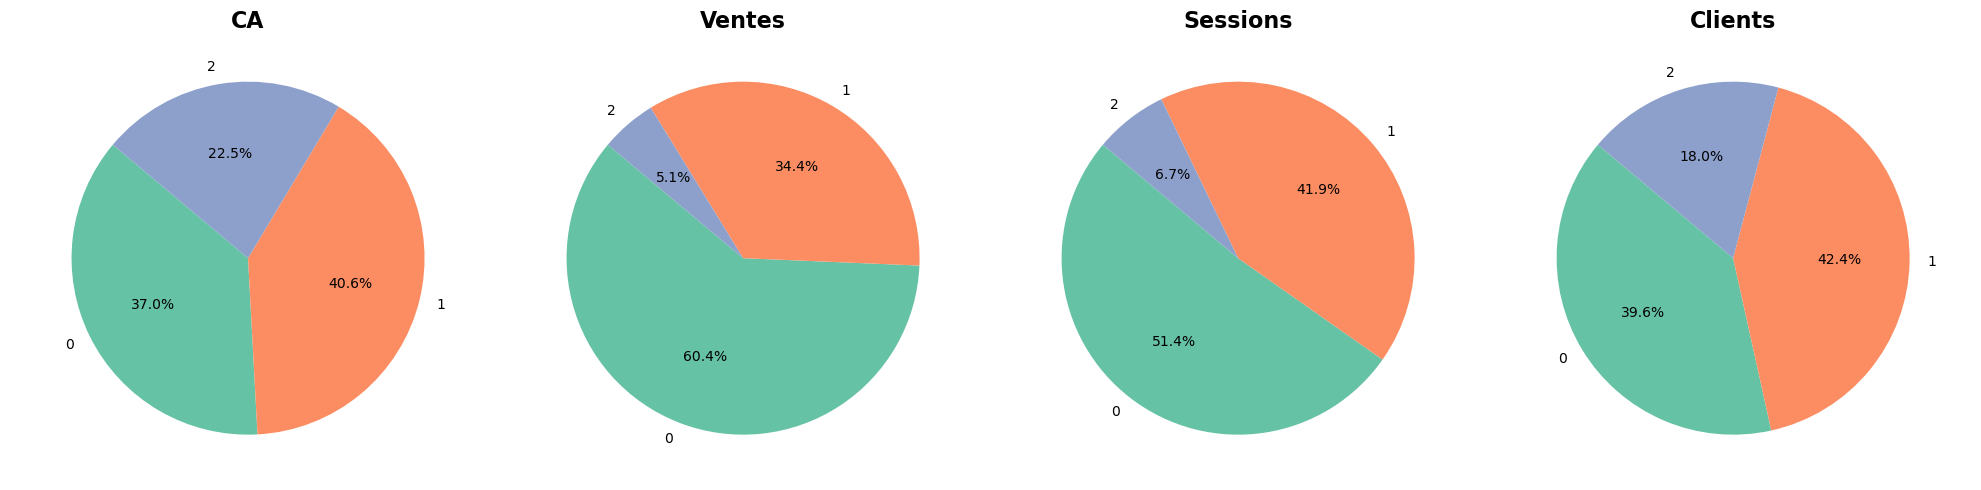

In [ ]:
# Afficher la  répartition
# Appeler la fonction après avoir défini les données filtrées
from fonctions import analyser_repartition_par_groupe
# Analyser par "categ"
analyser_repartition_par_groupe(donnees, "categ")

##### La **catégorie 2** ne représente que **5,1 % des ventes** mais **22,5 % du CA**. 
##### La **catégorie 0** représente **60,4 % des ventes** et 51,4 % du nombre de sessions pour **37 % du CA**.

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="5-1-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">5.1.3 - Evolution</h4>
</div>

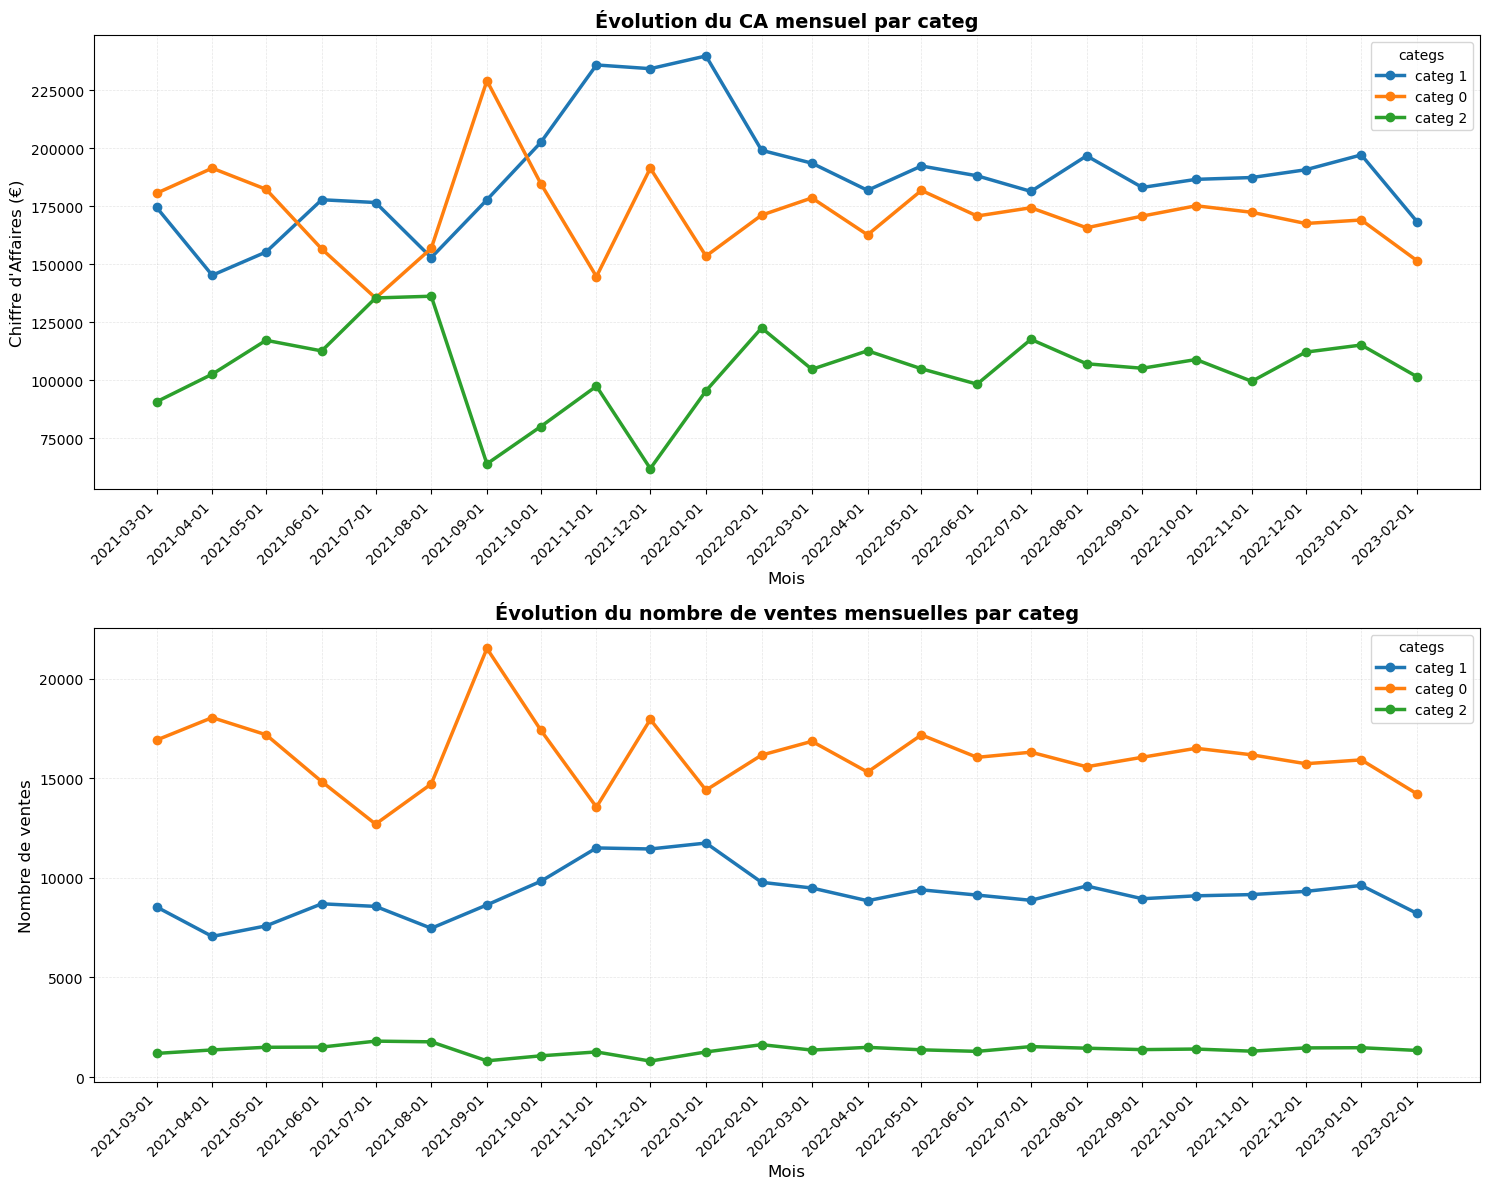

In [ ]:
# Afficher l'évolution
# Appeler la fonction après avoir défini les données filtrées
from fonctions import evolution_repartition_par_groupe
# Analyser par "categ"
evolution_repartition_par_groupe(donnees, "categ")

##### Ces graphiques montrent une certaine **instabilité pour le mois d'octobre 2021**.

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="5-1-4" style="margin: auto; padding: 20px; color: RGB(255,184,100);">5.1.4 - Zoom sur le mois d'octobre 2021</h4>
</div>

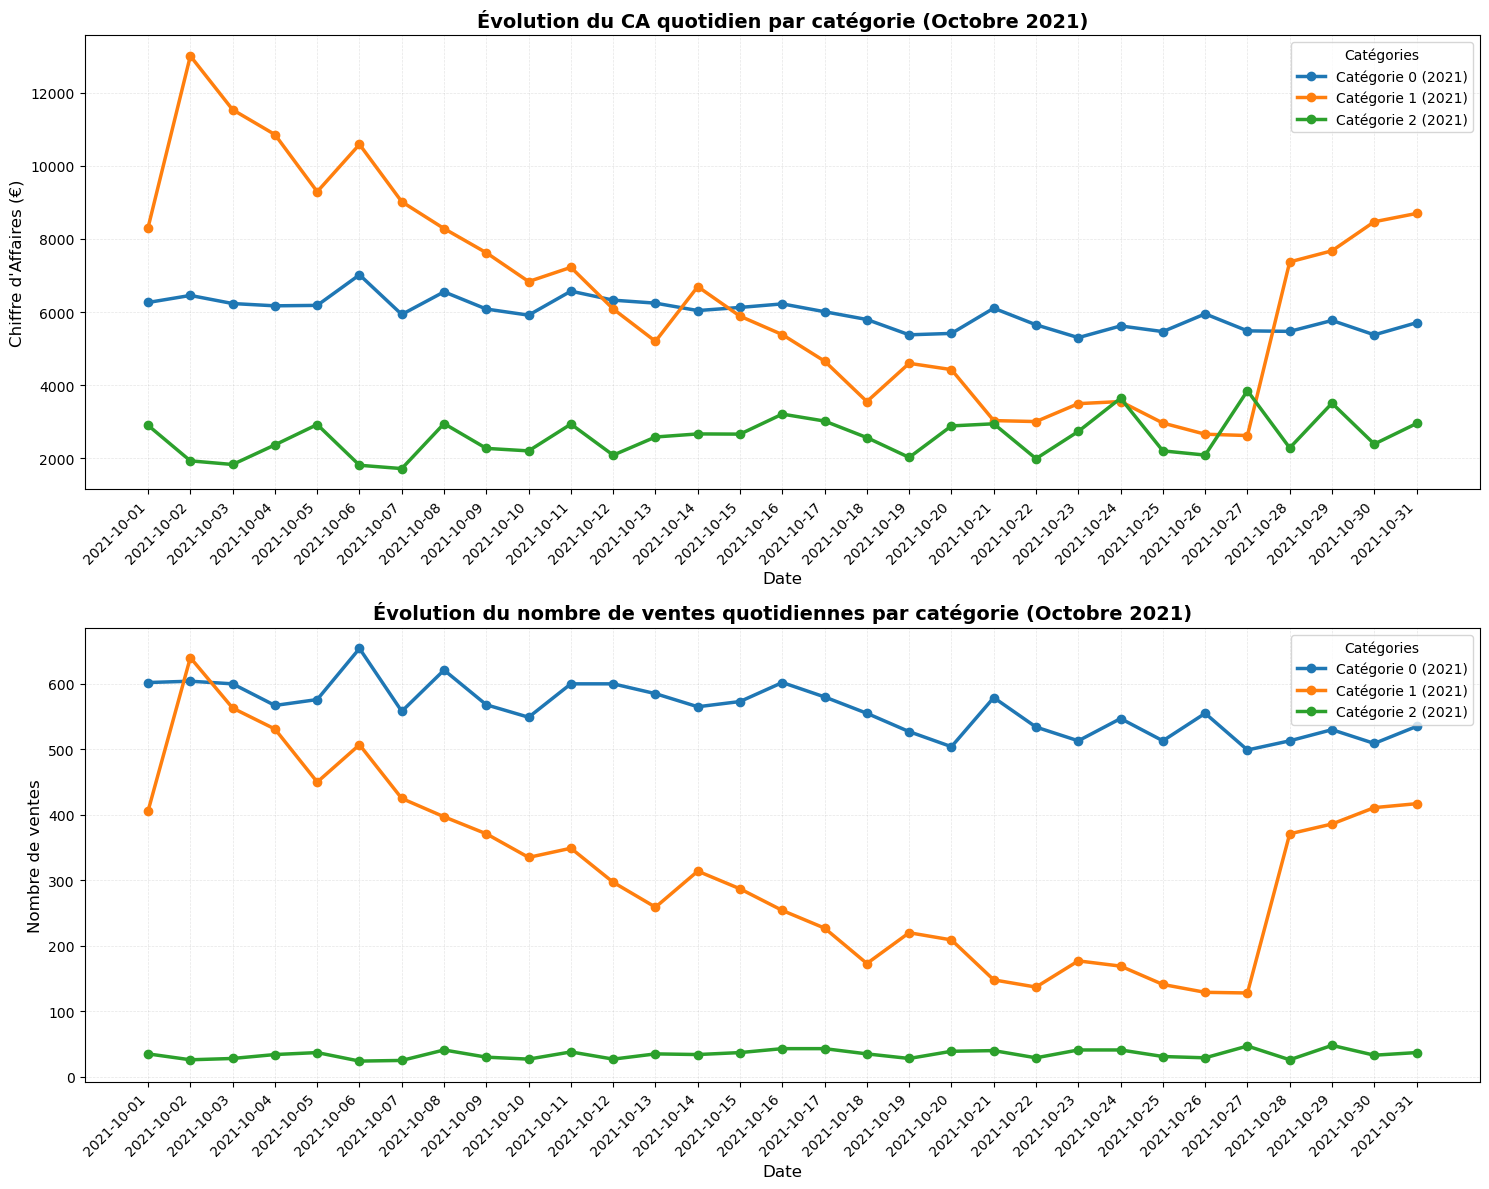

In [ ]:
# Afficher un zoom sur le mois d'octobre 2021
# Appeler la fonctionassociée
from fonctions import analyse_evolution_octobre_2021
analyse_evolution_octobre_2021(donnees)

##### Nous pouvons en déduire que **les produits de catégorie 1 sont à l'origine de la variation des ventes et du CA du mois d'octobre 2021**.

<div style="border: 1px solid RGB(255,184,100);" >
<h3 id="5-2"style="margin: auto; padding: 20px; color: RGB(255,184,100); ">5.2 - Répartition selon le sexe </h3>
</div>

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="5-2-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">5.2.1 - Analyse chiffrée</h4>
</div>

In [ ]:
# Afficher les analyses chiffrées
# Filtrer les données pour la première année (mars 2021 - février 2022)
donnees_premiere_annee = donnees[(donnees['année'] == 2021) & (donnees['mois'] >= 3) | (donnees['année'] == 2022) & (donnees['mois'] <= 2)]
# Filtrer les données pour la seconde année (mars 2022 - février 2023)
donnees_seconde_annee = donnees[(donnees['année'] == 2022) & (donnees['mois'] >= 3) | (donnees['année'] == 2023) & (donnees['mois'] <= 2)]
# Appeler la fonction après avoir défini les données filtrées
from fonctions import afficher_indicateurs_par_groupe
# Analyser par "sex"
afficher_indicateurs_par_groupe(donnees_premiere_annee, donnees_seconde_annee, "sex")


--- Sex f ---
Première année commerciale (mars 2021 - février 2022):
- CA total (€) : 2893153.10
- Nombre de commandes : 84074
- Nombre de produits vendus : 167654
- Produits par commande : 1.99
- Panier moyen (€) : 34.41

Seconde année commerciale (mars 2022 - février 2023):
- CA total (€) : 2903771.98
- Nombre de commandes : 84472
- Nombre de produits vendus : 165840
- Produits par commande : 1.96
- Panier moyen (€) : 34.38

Évolutions entre les deux années:
- Évolution CA total (€) : 0.37%
- Évolution Nombre de commandes : 0.47%
- Évolution Nombre de produits vendus : -1.08%
- Évolution Produits par commande : -1.55%
- Évolution Panier moyen (€) : -0.11%

--- Sex m ---
Première année commerciale (mars 2021 - février 2022):
- CA total (€) : 2673560.25
- Nombre de commandes : 76944
- Nombre de produits vendus : 154603
- Produits par commande : 2.01
- Panier moyen (€) : 34.75

Seconde année commerciale (mars 2022 - février 2023):
- CA total (€) : 2672881.68
- Nombre de commandes : 769

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="5-2-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">5.2.2 - Répartition</h4>
</div>

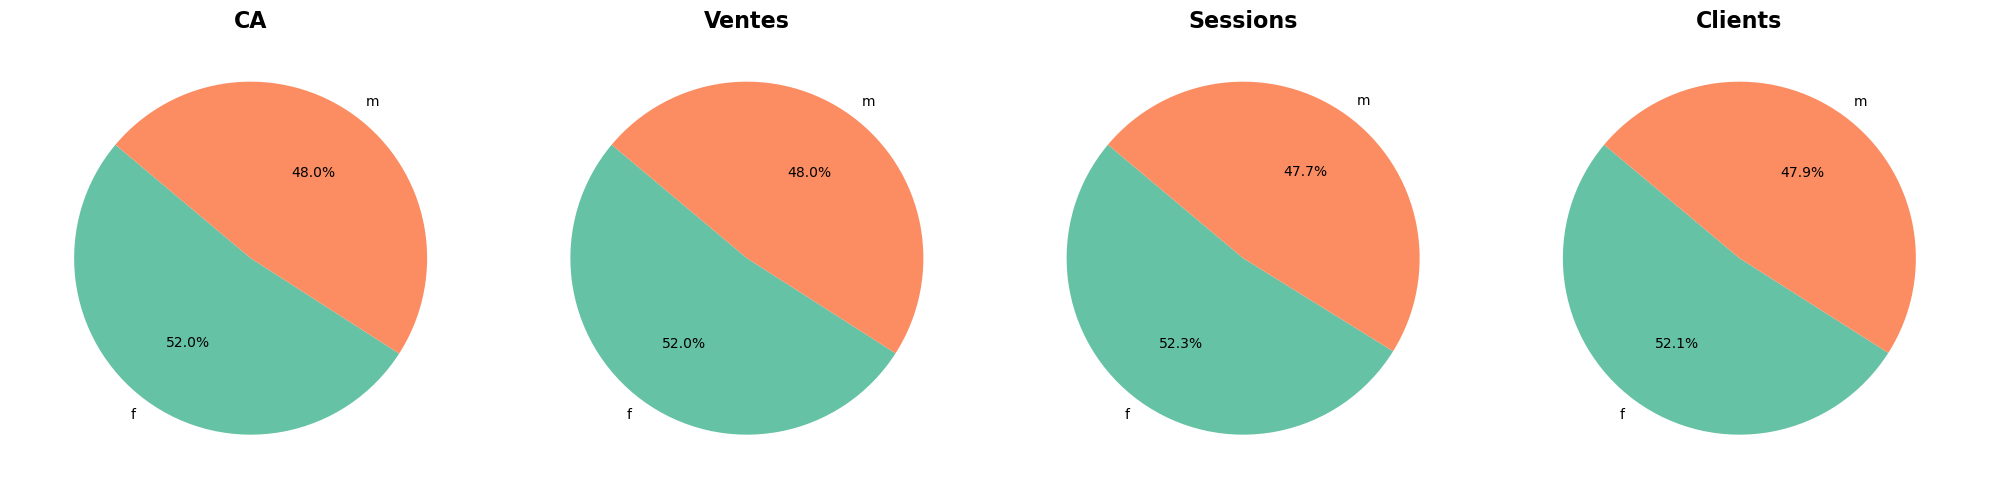

In [ ]:
# Afficher la  répartition
# Appeler la fonction après avoir défini les données filtrées
from fonctions import analyser_repartition_par_groupe
# Analyser par "sex"
analyser_repartition_par_groupe(donnees, "sex")

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="5-2-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">5.2.3 - Evolution</h4>
</div>

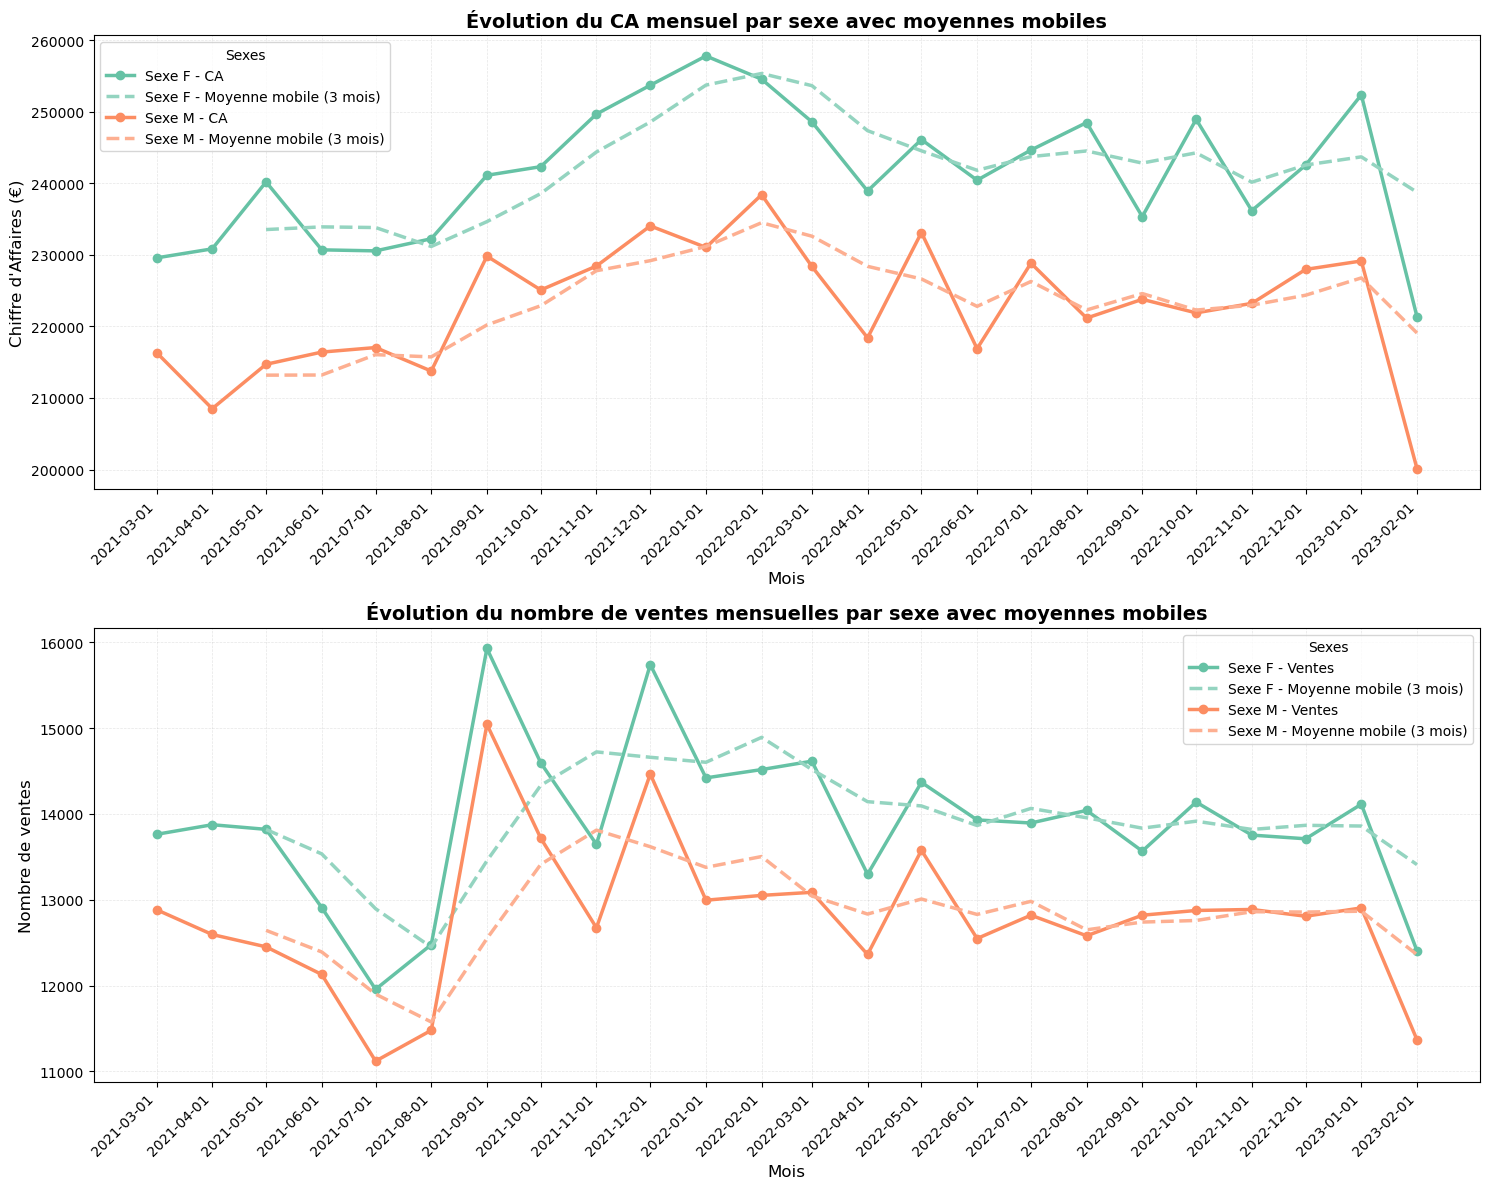

In [ ]:
# Afficher l'évolution
# Appeler la fonction après avoir défini les données filtrées
from fonctions import analyse_evolution_par_sexe
analyse_evolution_par_sexe(donnees)

##### Il y a **plus de clientes que de clients** (52,1 %). Elle réalisent **plus de CA et plus de ventes**.

<div style="border: 1px solid RGB(255,184,100);" >
<h3 id="5-3" style="margin: auto; padding: 20px; color: RGB(255,184,100); ">5.3 - Répartition selon l'âge </h3>
</div>

<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="5-3-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">5.3.1 - Analyse chiffrée</h4>
</div>

In [ ]:
# Analyse chiffrée selon l'âge

# Importation de la fonction associée
from fonctions import analyser_comportement_clients
analyser_comportement_clients(donnees)


--- Tranche d'âge 50-59 ---
Première année commerciale (mars 2021 - février 2022):
- CA_total : 913054.42

Seconde année commerciale (mars 2022 - février 2023):
- CA_total : 905594.35

Évolutions entre les deux années:
- Évolution CA_total : -0.82%

--- Tranche d'âge 40-49 ---
Première année commerciale (mars 2021 - février 2022):
- CA_total : 1382943.15

Seconde année commerciale (mars 2022 - février 2023):
- CA_total : 1359437.57

Évolutions entre les deux années:
- Évolution CA_total : -1.70%

--- Tranche d'âge 60+ ---
Première année commerciale (mars 2021 - février 2022):
- CA_total : 966128.85

Seconde année commerciale (mars 2022 - février 2023):
- CA_total : 972095.75

Évolutions entre les deux années:
- Évolution CA_total : 0.62%

--- Tranche d'âge 30-39 ---
Première année commerciale (mars 2021 - février 2022):
- CA_total : 1226546.61

Seconde année commerciale (mars 2022 - février 2023):
- CA_total : 1228455.54

Évolutions entre les deux années:
- Évolution CA_total : 0.16%


<div style="border: 1px solid RGB(255,184,150);" >
<h4 id="5-3-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">5.3.2 - Répartition</h4>
</div>

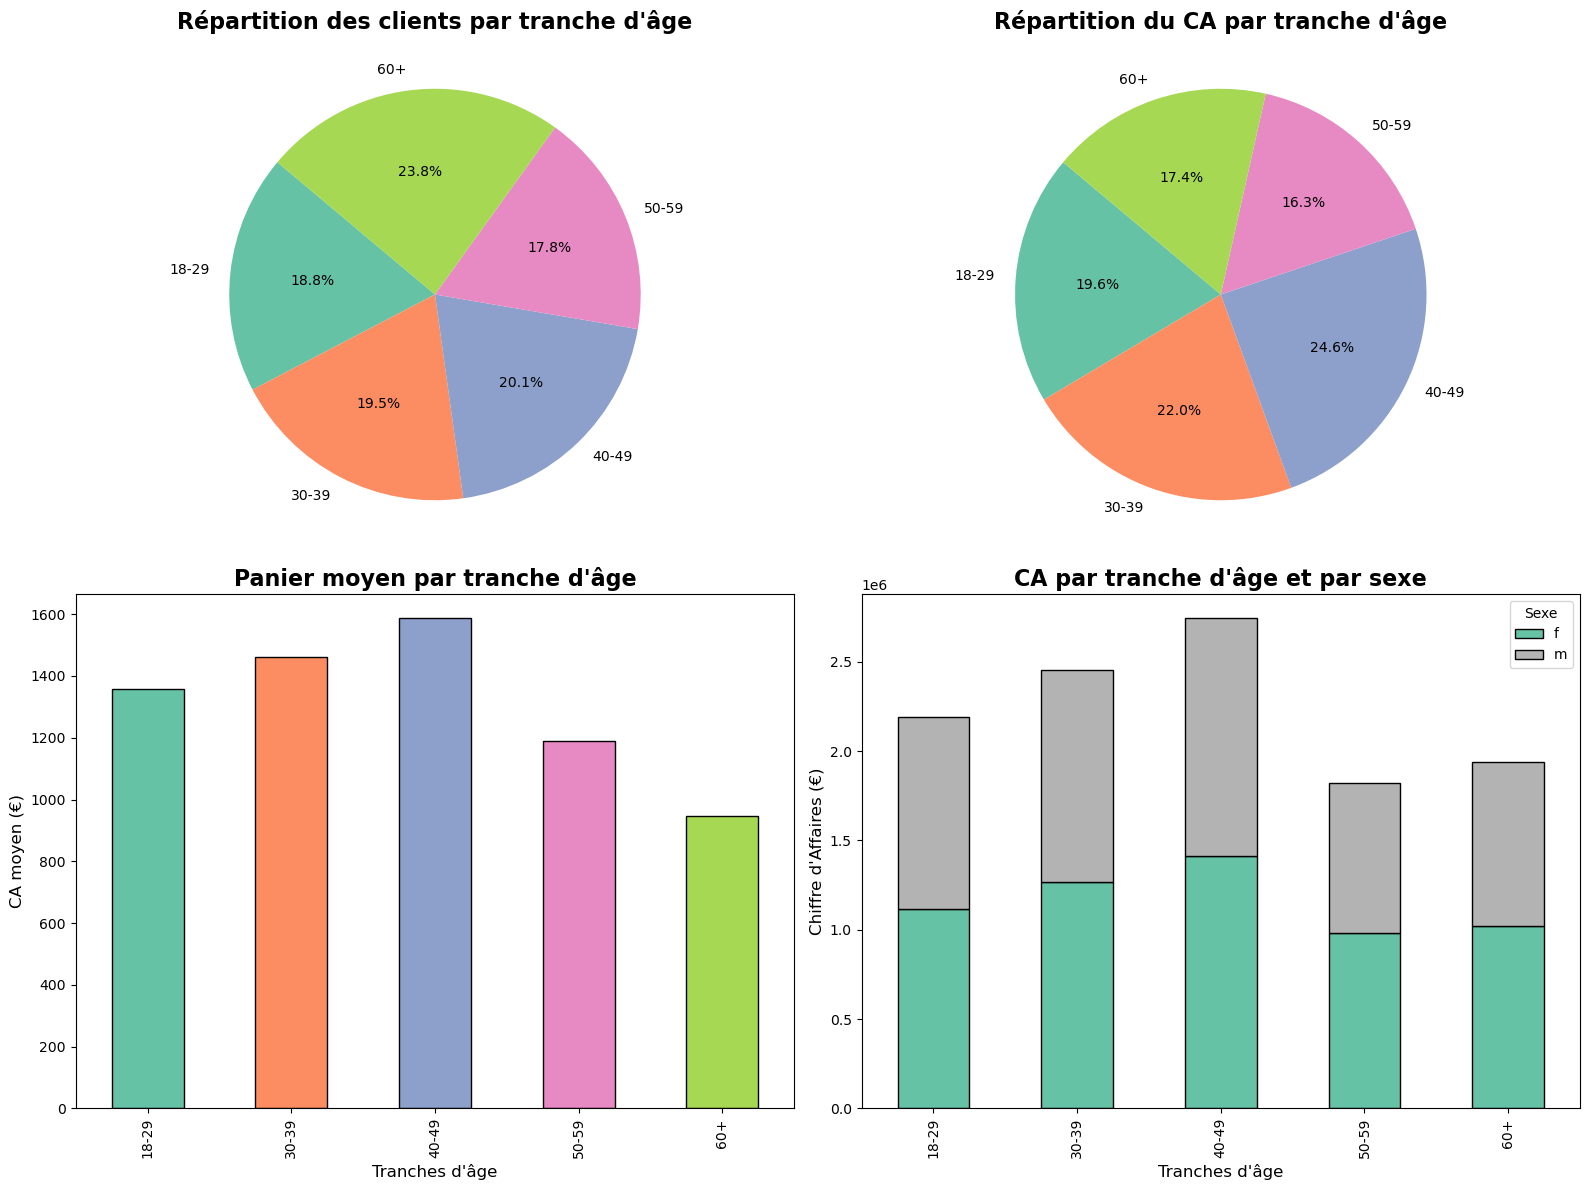

In [ ]:
# Répartion selon l'âge

# Importation de la fonction associée
from fonctions import repartition_par_age
repartition_par_age(donnees)

##### Les clients de **plus de 60 ans sont les plus nombreux** (23,8 %) mais ceux qui génèrent le **moins de CA** (17,4 %).
##### **24,6 % du CA est réalisé par les 40-49 ans**.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


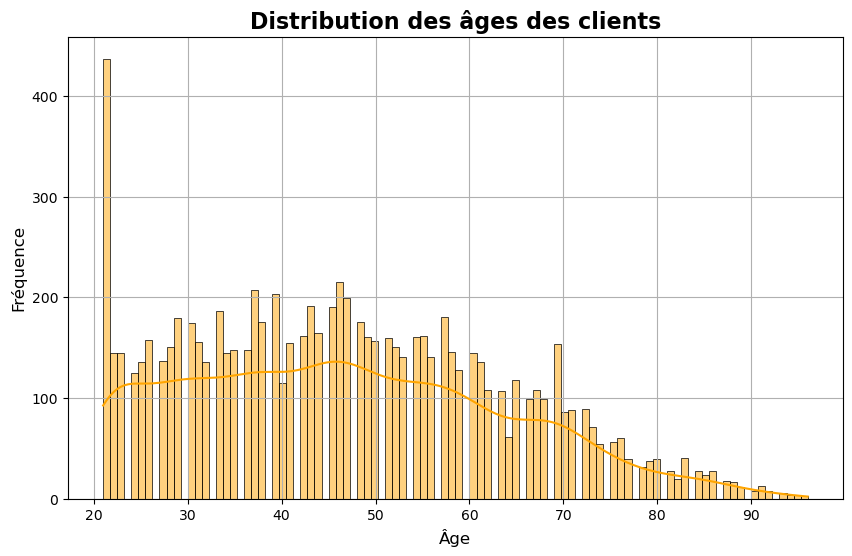

In [ ]:
# Afficher une répartition plus précise de l'âge des clients uniques avec un histogramme
clients_uniques = donnees.drop_duplicates(subset='client_id')
plt.figure(figsize=(10, 6))
sns.histplot(clients_uniques["age"], bins=100, kde=True, color='orange')
plt.title('Distribution des âges des clients', fontsize=16, fontweight='bold')
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(True)
plt.show()

##### **Les clients de 21 ans sont beaucoup plus nombreux que les autres**. Cela ne semble pas logique. S'agit-il de clients plus jeunes qui ne peuvent pas indiquer un âge plus bas que 21 ans ?

In [ ]:
# Filtrer les clients âgés de 21 ans
clients_21_ans = clients_uniques[clients_uniques["age"] == 21]

# Calculer le nombre de clients âgés de 21 ans
nombre_clients_21_ans = clients_21_ans["client_id"].nunique()

print(f"Le nombre de clients âgés de 21 ans est : {nombre_clients_21_ans}")

Le nombre de clients âgés de 21 ans est : 437


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


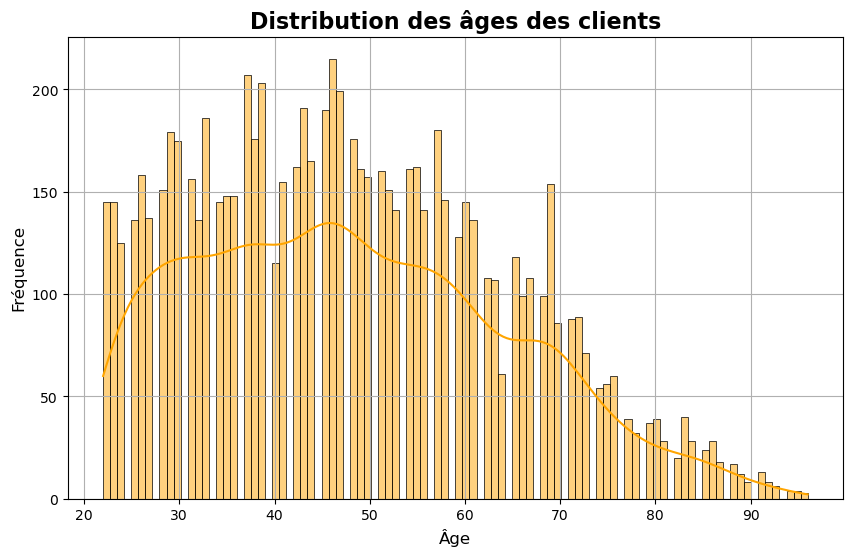

In [ ]:
# Supprimer les clients âgés de 21 ans (données abérrantes)
donnees_sans_21_ans = clients_uniques[clients_uniques["age"] != 21]

# Vérifier la distribution des âges avec un histogramme
plt.figure(figsize=(10, 6))
sns.histplot(donnees_sans_21_ans["age"], bins=100, kde=True, color='orange')
plt.title('Distribution des âges des clients', fontsize=16, fontweight='bold')
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(True)
plt.show()

##### Cette distributions sans les clients de 21 ans semble plus logique.

Statistiques descriptives des âges (clients uniques, sans 21 ans) :
count    8159.000000
mean       48.118274
std        16.244821
min        22.000000
25%        35.000000
50%        47.000000
75%        60.000000
max        96.000000
Name: age, dtype: float64

Nombre de clients uniques par quantile d'âge :
groupe_quantile_age
Q1     846
Q2     797
Q3     834
Q4     811
Q5     960
Q6     654
Q7     936
Q8     770
Q9     813
Q10    738
Name: count, dtype: int64


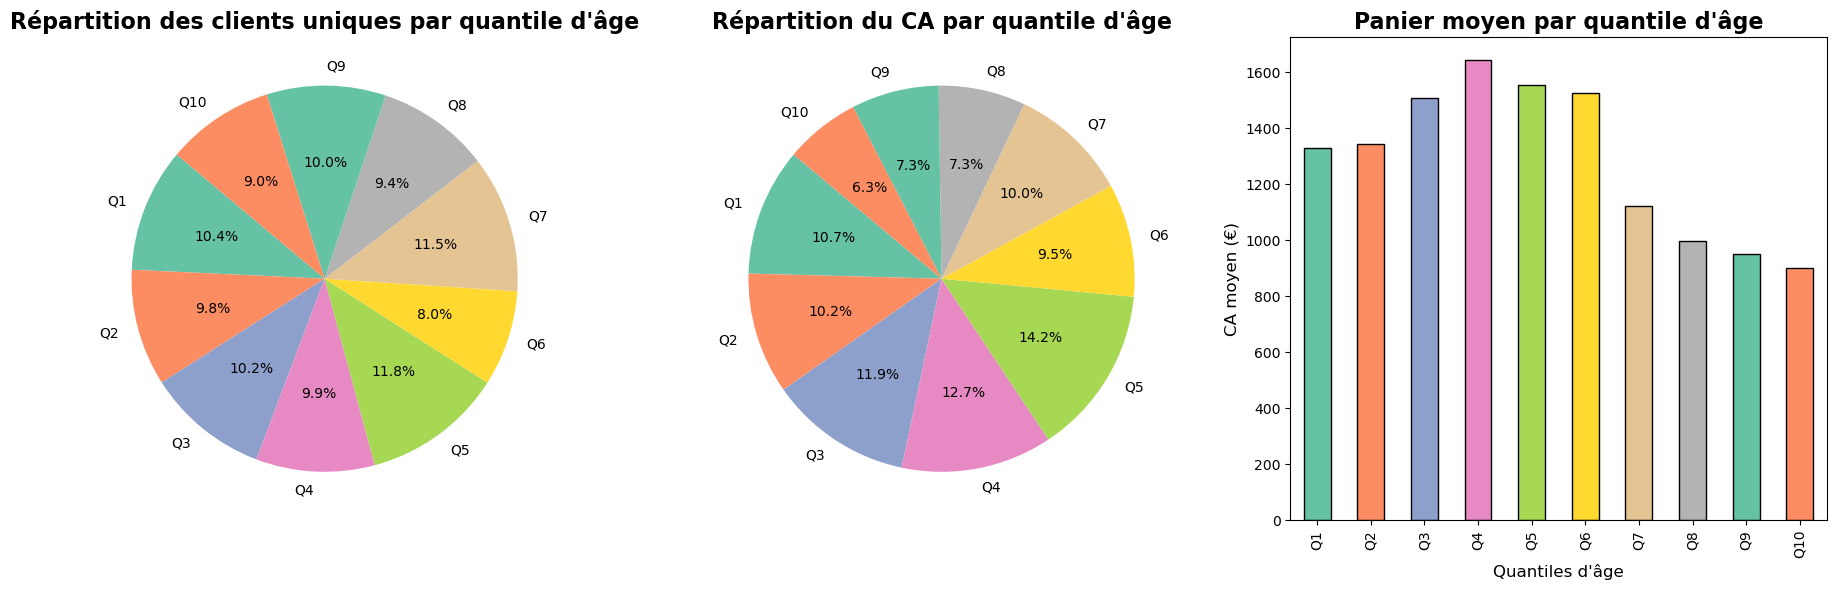


Limites d'âge pour chaque quantile :
                     min  max
groupe_quantile_age          
Q1                    22   27
Q2                    28   32
Q3                    33   37
Q4                    38   42
Q5                    43   47
Q6                    48   51
Q7                    52   57
Q8                    58   63
Q9                    64   71
Q10                   72   96


/Users/adrianaguilera/Desktop/P9/fonctions.py:1699: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(clients_uniques.groupby("groupe_quantile_age")["age"].agg(["min", "max"]))


In [ ]:
# Répartion selon l'âge (hors 21 ans)

# Importation de la fonction associée
from fonctions import repartition_par_quantile_age
repartition_par_quantile_age(donnees)

##### Nous pouvons voir que la **moitié du CA** est réalisé par les quantiles Q3, Q4, Q5 et Q6 qui représentent les **clients âgés de 33 à 51 ans**.
##### En revanche, les clients âgés de **58 à 96 ans réalisent moins d'un quart du CA**.

<div style="background-color: RGB(255,184,100);" >
<h2 id="etape-6" style="margin: auto; padding: 20px; ">Etape 6 - Analyse des corrélations</h2>
</div>

<div style="border: 1px solid RGB(255,184,150);" >
<h3 id="6-1" style="margin: auto; padding: 20px; color: RGB(255,184,100);">6.1 - Lien entre genre et catégorie d'achat</h3>
</div>

#### Existe-t-il un **lien entre le genre d'un client et la catégorie d'achat** ?

##### Le sexe des clients et la catégorie d’achat sont deux variables qualitatives.
##### Nous allons donc faire un test du **Chi-2** (qui ne peut s'utiliser que lorsque l'on veut étudier la relation ou pas entre deux caractères qualitatifs). Nous le préférerons au test de **Fisher** du fait de la taille de l'échantillon et du nombre de fréquences attendues (+5).
##### **Hypothèses** (supposition ou proposition à lʼaffirmatif qui établit une relation entre deux variables ou plus) :
##### **H0** : Il n'y a pas de relation entre le genre (sex) et la catégorie d'achat (categ).
##### **H1** : Il existe une relation entre le genre (sex) et la catégorie d'achat (categ).
##### **Formule du Chi-2** : 
![Formule du Chi-2](chi_squared_test.svg)


In [ ]:
# Importer la fonction pour cette analyse
from fonctions import analyse_table_contingence

# Appeler la fonction
analyse_table_contingence(donnees)

Table de contingence (comptages) :
 categ       0       1      2
sex                         
f      200793  115721  16980
m      186488  104884  15868

Table de contingence (en pourcentage) :
 categ          0          1         2
sex                                  
f      60.208879  34.699575  5.091546
m      60.697826  34.137482  5.164692

Résultats du test du Chi-2 :
Statistique du Chi-2 : 22.67
Degrés de liberté (dof) : 2
Matrice des fréquences attendues :
 categ              0              1             2
sex                                              
f      201574.896625  114822.131914  17096.971461
m      185706.103375  105782.868086  15751.028539
p-value : 0.0000

Conclusion :
Nous rejetons H0. Il existe une association statistiquement significative entre le genre et la catégorie d'achat.


In [ ]:
# Importer la fonction pour la tableau de contingence
from fonctions import analyse_table_contingence_style
# Appeler la fonction
styled_table = analyse_table_contingence_style(donnees)
styled_table

##### Comme la **p-value** (Indicateur statistique qui mesure la probabilité que les résultats observés soient dus au hasard) **est inférieure à 0.05, nous rejetons l’hypothèse nulle (H0)**, qui stipule qu’il n’y a pas de relation entre le genre et la catégorie d’achat. Cela suggère que **le genre peut avoir un impact sur le choix des catégories de produits**.

##### Cependant, en analysant la répartition des catégories achetées pour chaque genre, il semblerait qu'il y ai peu de différence. 

##### Nous allons donc continuer à analyser cette corrélation en effectuant un **test V de Cramer** qui va nous permettre d'évaluer la force de cette association. 

#### **Formule du V de Cramer** : 
![Formule du V de Cramer](formule09-VCramer.png)

In [ ]:
# Test de Cramer
# Données
chi2 = 22.67
n = 640734
r, c = 2, 3
# Calcul de Cramer
cramer_v = np.sqrt(chi2 / (n * (min(r - 1, c - 1))))
print("Cramer's V :", cramer_v)

Cramer's V : 0.005948217974731357


##### Le **V de Cramer est de 0.006**.

##### Cela indique une **très faible association entre le sexe des clients et la catégorie d’achat**, même si le test du Chi-2 détecte une association significative en raison de la grande taille de l’échantillon.

<div style="border: 1px solid RGB(255,184,150);" >
<h3 id="6-2" style="margin: auto; padding: 20px; color: RGB(255,184,100);">6.2 - Lien entre âge et montant des achats</h3>
</div>

#### Existe-t-il un **lien entre l'âge des clients et le montant des achats** ?

##### L'âge des clients et le montant des achats sont deux variables quantitatives.
##### Nous pourrions utiliser le test de **Shapiro-Wilk**, mais nous avons un échantillon très grand (il aurait fallu - de 5000 observations). Nous allons donc faire un test de **Kolmogorov-Smirnov**, plus adapté.
##### **Hypothèses** :
##### **H0** : Les données suivent une distribution normale.
##### **H1** : Les données ne suivent pas une distribution normale.
##### Formules : 
# ![Kolmogorov-Smirnov1](1.png)
# ![Kolmogorov-Smirnov2](2.png)
# ![Kolmogorov-Smirnov3](3.png)

##### En fonction de nos résultats, nous utiliserons les tests de **Pearson** (paramètrique) et de **Spearman** (non paramètrique) afin de déterminer la relation entre les variables est significative ou non.
##### **Hypothèses** :
##### **H0** : Il n'existe pas de relation significative entre les variables.
##### **H1** : Il existe une relation significative entre les variables.
##### Formule corrélation de Pearson  : 
![Pearson](Pearson.png)
##### Formule corrélation de Spearman  : 
![Spearman](Spearman.png)

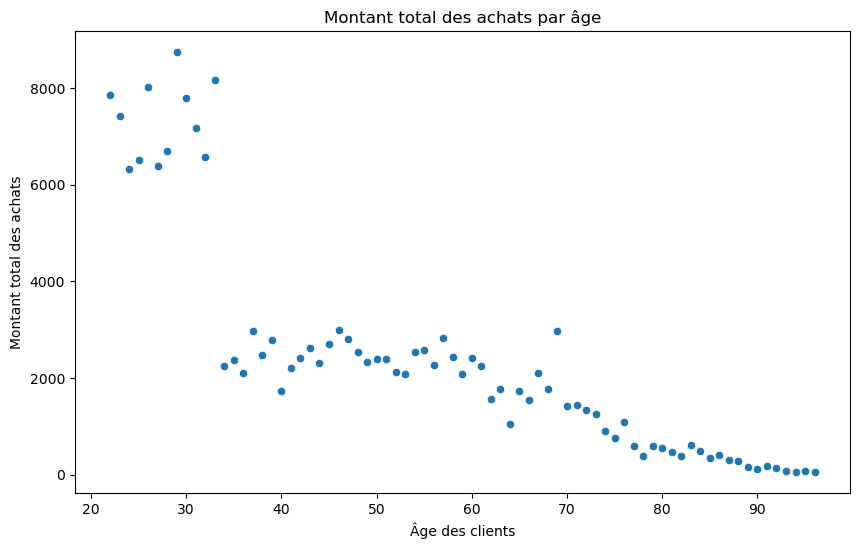

In [ ]:
# Commençons par un simple graphique en nuages
# Calcul du montant total des achats par âge
montant_total_par_age = donnees_sans_21_ans.groupby(['age'])['price'].sum()
# Création du graphique
plt.figure(figsize=(10, 6))
sns.scatterplot(x=montant_total_par_age.index, y=montant_total_par_age.values)
plt.xlabel('Âge des clients')
plt.ylabel('Montant total des achats')
plt.title('Montant total des achats par âge')
plt.show()

In [ ]:
# Importer la fonction pour cette analyse
from fonctions import analyse_lien_age_montant
# Appeler la fonction
analyse_lien_age_montant(donnees_sans_21_ans, montant_total_par_age)

Test de normalité pour l'âge : Statistique de KS = 0.06275928493508426, p-value = 2.21855781692325e-28
Test de normalité pour le montant total : Statistique de KS = 0.24896135649476114, p-value = 0.00013956093204648074
La distribution de l'âge n'est pas normale (on rejette l'hypothèse nulle).
La distribution du montant total des achats n'est pas normale (on rejette l'hypothèse nulle).
Test de corrélation de Spearman : Statistique = -0.9205974395448079, p-value = 1.5598101733473648e-31
Il existe une relation significative entre l'âge et le montant total des achats (H1).


#### **Les tests de normalité indiquent que les distributions ne sont pas normales**, non gaussiennes (caractérisée par une courbe en cloche symétrique, définie par la moyenne et l'écart-type). 

#### Il faut donc utiliser un **test de Spearman** (non paramétrique). Ce test nous indique une forte corrélation négative (-0.92). La p-value est très faible, ce qui signifie qu’il existe une relation statistiquement significative.

#### **Il y a donc une relation significative entre l’âge et le montant total des achats**, plus un client est âgé, moins il dépense. Avec des achats bien plus élevés pour les clients de moins de 33 ans.

<div style="border: 1px solid RGB(255,184,150);" >
<h3 id="6-3" style="margin: auto; padding: 20px; color: RGB(255,184,100);">6.3 - Lien entre âge et panier moyen</h3>
</div>

#### Existe-t-il un **lien entre l'âge des clients et le panier moyen** ?

##### L'âge des clients et le panier moyen sont deux variables quantitatives.
##### Nous pourrions utiliser le test de **Shapiro-Wilk**, mais nous avons un échantillon très grand (il aurait fallu - de 5000 observations). Nous allons donc faire un test de **Kolmogorov-Smirnov**, plus adapté.
##### **Hypothèses** :
##### **H0** : Les données suivent une distribution normale.
##### **H1** : Les données ne suivent pas une distribution normale.
##### Formules : 
# ![Kolmogorov-Smirnov1](1.png)
# ![Kolmogorov-Smirnov2](2.png)
# ![Kolmogorov-Smirnov3](3.png)

##### En fonction de nos résultats, nous utiliserons les tests de **Pearson** (paramètrique) et de **Spearman** (non paramètrique) afin de déterminer la relation entre les variables est significative ou non.
##### **Hypothèses** :
##### **H0** : Il n'existe pas de relation significative entre les variables.
##### **H1** : Il existe une relation significative entre les variables.
##### Formule corrélation de Pearson  : 
![Pearson](Pearson.png)
##### Formule corrélation de Spearman  : 
![Spearman](Spearman.png)

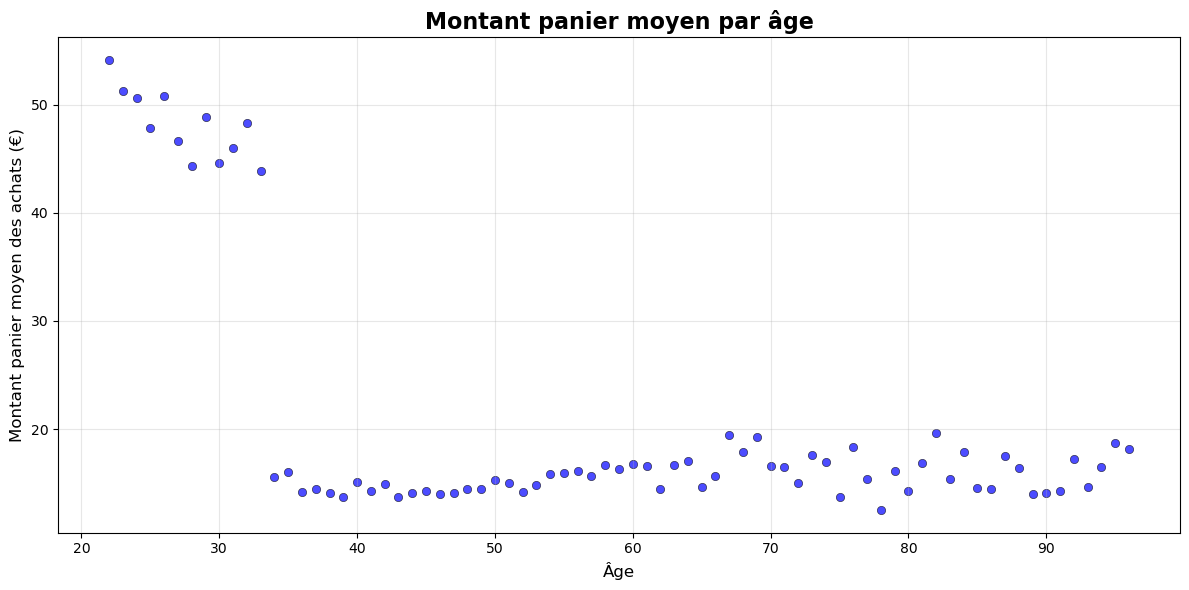

In [ ]:
# Commençons par un simple graphique en nuages
# Regrouper par âge individuel pour calculer le montant moyen des achats par âge
age_avg_price = donnees_sans_21_ans.groupby('age')['price'].mean().reset_index()
# Création du nuage de points
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=age_avg_price['age'], 
    y=age_avg_price['price'], 
    color='blue', 
    alpha=0.7, 
    edgecolor='black'
)
# Ajouter un titre et des labels
plt.title("Montant panier moyen par âge", fontsize=16, fontweight='bold')
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Montant panier moyen des achats (€)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Importer la fonction pour cette analyse
from fonctions import analyse_lien_age_panier
# Appeler la fonction
analyse_lien_age_panier(donnees_sans_21_ans, age_avg_price)

Test de normalité pour l'âge : Statistique de Kolmogorov-Smirnov = 1.0, p-value = 0.0
Test de normalité pour le panier moyen : Statistique de Kolmogorov-Smirnov = 1.0, p-value = 0.0
La distribution de l'âge n'est pas normale (on rejette l'hypothèse nulle).
La distribution du panier moyen n'est pas normale (on rejette l'hypothèse nulle).
Test de corrélation de Spearman : Statistique = -0.17718349928876242, p-value = 0.12832469490480994
Il n'y a pas de relation significative entre l'âge et le panier moyen (H0).


##### **Les tests de normalité indiquent que les distributions ne sont pas normales, non gaussiennes**.

##### Puisque les distributions ne sont pas normales, un **test de Spearman** (non paramétrique) a été utilisé. Ce test nous indique une très faible corrélation négative (-0.18). La p-value est relativement élevée (0.128), ce qui signifie qu’il n’existe pas de relation statistiquement significative.

##### **Il n’y a donc pas de relation significative entre l’âge et le panier moyen**. En d’autres termes, l’âge n’est pas un facteur déterminant dans le montant moyen des achats des clients dans cette analyse.

##### Cependant, nous constatons sur le graphique en nuages qu'il y a une forte différence entre les clients de moins de 33 ans qui ont des paniers moyen de plus de 40 € et les autres qui des paniers moyens inférieurs à 20 €. 
##### Regardons ça de plus près avec un **test de Mann-Whitney** (car nous allons séparer l'échantillon en deux groupes), préférable au test t de Student car la distribution n'est pas normale et non paramétrique.

##### **Hypothèses** :
##### **H0** : Les deux groupes proviennent de la même distribution, c’est-à-dire qu’il n’y a pas de différence significative entre les médianes des deux groupes.
##### **H1** : Les deux groupes proviennent de distributions différentes, ce qui signifie qu’il existe une différence significative entre les médianes des deux groupes.
##### Formule corrélation de Pearson  : 
![Mann-Whitney](Mann-Whitney-SXL_001.png)

In [ ]:
# Séparer les données en fonction de l'âge
moins_de_33_ans = donnees_sans_21_ans[donnees_sans_21_ans['age'] < 33]['price']
plus_de_33_ans = donnees_sans_21_ans[donnees_sans_21_ans['age'] >= 33]['price']

# Exécuter le test de Mann-Whitney
stat_H, p_val = mannwhitneyu(moins_de_33_ans, plus_de_33_ans)

# Résultats du test
print(f"Statistique U : {stat_H}")
print(f"p-value : {p_val}")

# Interprétation des résultats
if p_val < 0.05:
    print("Il existe une différence significative entre les deux groupes d'âge (H1).")
else:
    print("Aucune différence significative entre les deux groupes d'âge (H0).")

Statistique U : 8643238.0
p-value : 0.0
Il existe une différence significative entre les deux groupes d'âge (H1).


##### Le résultat du test de **Mann-Whitney** indique qu’il existe une **différence significative entre les deux groupes d’âge** concernant leur panier moyen, puisque la p-value est égale à 0.0, ce qui est bien inférieur à 0.05. 
##### Cela signifie que l’on peut rejeter l’hypothèse nulle (H0), et conclure qu’il y a une différence statistiquement significative entre les clients de moins de 33 ans et ceux de plus de 33 ans. 
##### Anlaysons cette différence de plus près.

In [ ]:
# Importer la fonction pour faire des graphiques en boite à moustache
from fonctions import boxplot_panier_moyen
# Appeler la fonction
boxplot_panier_moyen(donnees_sans_21_ans)

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers
/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
# Calcul du montant total dépensé par client
montant_total_par_client = donnees_sans_21_ans.groupby('client_id')['price'].sum()

# Ajouter cette information au DataFrame principal
donnees_sans_21_ans['montant_total_par_client'] = donnees_sans_21_ans['client_id'].map(montant_total_par_client)

# Calcul des médianes pour chaque groupe d'âge
mediane_moins_de_33 = moins_de_33_ans.median()
mediane_plus_de_33 = plus_de_33_ans.median()

print(f"Médiane pour les clients de moins de 33 ans : {mediane_moins_de_33}")
print(f"Médiane pour les clients de plus de 33 ans : {mediane_plus_de_33}")

Médiane pour les clients de moins de 33 ans : 43.99
Médiane pour les clients de plus de 33 ans : 13.99


<div style="border: 1px solid RGB(255,184,150);" >
<h3 id="6-4" style="margin: auto; padding: 20px; color: RGB(255,184,100);">6.4 - Lien entre âge et fréquence d'achat</h3>
</div>

#### Existe-t-il un **lien entre l'âge des clients et la fréquence des achats** ?

##### L'âge des clients et la fréquence des achats sont deux variables quantitatives.
##### Nous pourrions utiliser le test de **Shapiro-Wilk**, mais nous avons un échantillon très grand (il aurait fallu - de 5000 observations). Nous allons donc faire un test de **Kolmogorov-Smirnov**, plus adapté.
##### **Hypothèses** :
##### **H0** : Les données suivent une distribution normale.
##### **H1** : Les données ne suivent pas une distribution normale.
##### Formules : 
# ![Kolmogorov-Smirnov1](1.png)
# ![Kolmogorov-Smirnov2](2.png)
# ![Kolmogorov-Smirnov3](3.png)

##### En fonction de nos résultats, nous utiliserons les tests de **Pearson** (paramètrique) et de **Spearman** (non paramètrique) afin de déterminer la relation entre les variables est significative ou non.
##### **Hypothèses** :
##### **H0** : Il n'existe pas de relation significative entre les variables.
##### **H1** : Il existe une relation significative entre les variables.
##### Formule corrélation de Pearson  : 
![Pearson](Pearson.png)
##### Formule corrélation de Spearman  : 
![Spearman](Spearman.png)

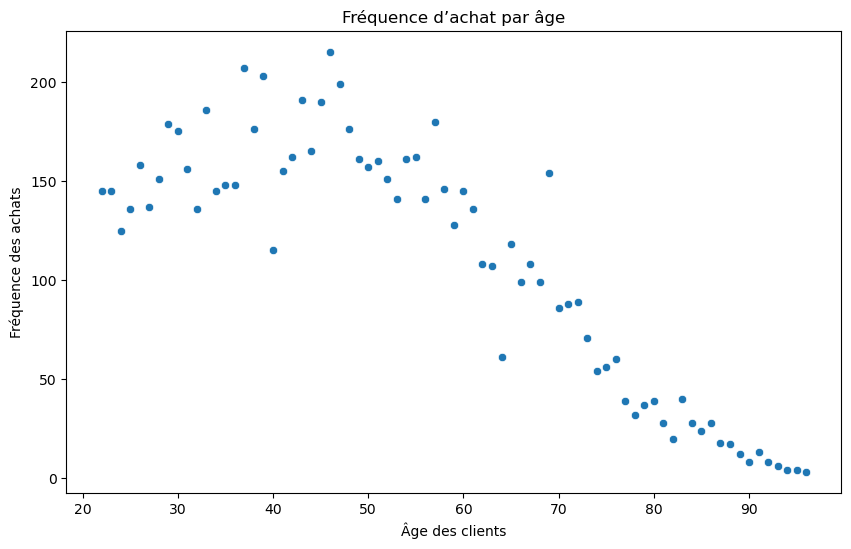

In [ ]:
# Commençons par un simple graphique en nuages
# Calcul de la fréquence des achats par âge
nb_achats = donnees_sans_21_ans.groupby(['age'])['session_id'].count()

# Création du graphique
plt.figure(figsize=(10, 6))
sns.scatterplot(x=nb_achats.index, y=nb_achats.values)
plt.xlabel('Âge des clients')
plt.ylabel('Fréquence des achats')
plt.title('Fréquence d’achat par âge')
plt.show()

In [ ]:
# Importer la fonction pour cette analyse
from fonctions import test_normalite_corr_age_frequence_achats
# Appeler la fonction
test_normalite_corr_age_frequence_achats(donnees_sans_21_ans, nb_achats)

Test de normalité pour l'âge : Statistique de Kolmogorov-Smirnov = 1.0, p-value = 0.0
Test de normalité pour la fréquence des achats : Statistique de Kolmogorov-Smirnov = 0.9986501019683699, p-value = 1.1846833942066584e-215
La distribution de l'âge n'est pas normale (on rejette l'hypothèse nulle).
La distribution de la fréquence des achats n'est pas normale (on rejette l'hypothèse nulle).
Test de corrélation de Spearman : Statistique = -0.8172382813287439, p-value = 3.8102417613243055e-19
Il existe une relation significative entre l'âge et la fréquence des achats (H1).


##### Les tests de normalité indiquent que **les distributions ne sont pas normales**, car les p-value des tests de Shapiro-Wilk sont très faibles pour l’âge et la fréquence des achats, ce qui entraîne le rejet de l’hypothèse nulle de normalité. Les distributions sont donc non gaussiennes, et il est nécessaire d’utiliser un test non paramétrique.

##### Nous avons utilisé un **test de Spearman** pour analyser la relation entre l’âge et la fréquence d'achat. La statistique de corrélation est de -0,82 et la p-value est très faible.

##### **Il y a donc une relation significative entre l’âge et la fréquence d'achat**. Plus un client est jeune, plus il achète fréquemment.

<div style="border: 1px solid RGB(255,184,150);" >
<h3 id="6-5" style="margin: auto; padding: 20px; color: RGB(255,184,100);">6.5 - Lien entre âge et catégorie d'achat</h3>
</div>

#### Existe-t-il un **lien entre l'âge des clients et la catégorie d'achat** ?

##### L'âge des clients et la catégorie d'achat sont deux variables qualitatives (si on utilise les tranches d'âge).
##### Nous allons donc faire un test du **Chi-2** (qui ne peut s'utiliser que lorsque l'on veut étudier la relation ou pas entre deux caractères qualitatifs). Nous le préférerons au test de **Fisher** du fait de la taille de l'échantillon et du nombre de fréquences attendues (+5).

##### **Hypothèses** (supposition ou proposition à lʼaffirmatif qui établit une relation entre deux variables ou plus) :
##### **H0** : Il n'y a pas de relation entre le genre (sex) et la catégorie d'achat (categ).
##### **H1** : Il existe une relation entre le genre (sex) et la catégorie d'achat (categ).
##### **Formule du Chi-2** : 
![Formule du Chi-2](chi_squared_test.svg)

In [ ]:
# Importer la fonction pour les graphiques
from fonctions import graphique_age_categorie
# Appeler la fonction
graphique_age_categorie(donnees_sans_21_ans, donnees)

In [ ]:
# Importer la fonction pour cette analyse
from fonctions import analyse_age_categorie
# Appeler la fonction 
analyse_age_categorie(donnees)

Table de contingence (comptages) :
 categ            0      1      2
groupe_age                      
18-29        12032  21380  21391
30-39        95870  37209   8952
40-49       154841  50421    733
50-59        75247  46735    736
60+          49291  64860   1036

Table de contingence (en pourcentage) :
 categ               0          1          2
groupe_age                                 
18-29       21.955002  39.012463  39.032535
30-39       67.499349  26.197802   6.302849
40-49       75.167358  24.476808   0.355834
50-59       61.317003  38.083248   0.599749
60+         42.792155  56.308438   0.899407

Résultats du test du Chi-2 :
Statistique du Chi-2 : 194830.52
Degrés de liberté (dof) : 8
Matrice des fréquences attendues :
 categ                   0             1             2
groupe_age                                           
18-29        33124.761044  18868.697174   2809.541782
30-39        85848.273560  48901.336210   7281.390231
40-49       124510.248551  70924.169741 

In [ ]:
# Importer la fonction pour le tableau de contingence
from fonctions import tableau_contingence_age_categorie
# Appeler la fonction
tableau_contingence_age_categorie()

##### La statistique de **Chi-2 est très élevée**, ce qui suggère que l’**association entre les variables âge et catégorie d’achat est très significative**.

##### Comme la **p-value est inférieure à 0.05, nous rejetons l’hypothèse nulle (H0)**, qui stipule qu’il n’y a pas de relation entre l'âge et la catégorie d’achat. Cela suggère que l'âge peut avoir un impact sur le choix des catégories de produits.

##### Nous allons donc continuer à analyser cette corrélation en effectuant un **test V de Cramer** qui va nous permettre d'évaluer la force de cette association. 

#### **Formule du V de Cramer** : 
![Formule du V de Cramer](formule09-VCramer.png)

In [ ]:
# Résultats du test Chi-2
chi2 = 194830.52  # Statistique Chi-2 obtenue
n = 640734  # Nombre total d'observations

# Dimensions de la table de contingence
r, c = table_contingence2.shape  # Nombre de lignes et de colonnes dans la table

# Calcul du V de Cramer
cramer_v = np.sqrt(chi2 / (n * (min(r - 1, c - 1))))

# Affichage du résultat
print("Cramer's V :", cramer_v)

Cramer's V : 0.3899191920677372


##### Rappel pour l'interpretation du V de Cramer : 
##### < 0.1 : Association faible
##### 0.1 - 0.3 : Association modérée
##### > 0.3 : Association forte
##### Un V de Cramer à 0,38 indique donc une **forte association entre l'âge des clients et la catégorie d’achat**.